### DATASETS

In [ ]:
# [datasets]  https://data.mendeley.com/datasets/jxwvdwhpc2/1


## EDA DEL DATASETS

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## VISUALIZACION TIPOS DE CÁNCER

### Representación de una imagen por clase

In [ ]:
# import os
# import random

# # Carpeta principal donde están las imágenes
# base_path = "/content/drive/My Drive/Colab Notebooks/clasificacion multiclase"

# # Rutas de imágenes y sus etiquetas
# image_paths = []
# labels = []

# # Clases (nombres de carpetas)
# clases = set()

# for carpeta_grupo in os.listdir(base_path):
#     ruta_grupo = os.path.join(base_path, carpeta_grupo)
#     if not os.path.isdir(ruta_grupo):
#         continue  # Si no es carpeta, la saltamos

#     for nombre_clase in os.listdir(ruta_grupo):
#         ruta_clase = os.path.join(ruta_grupo, nombre_clase)
#         if os.path.isdir(ruta_clase):
#             clases.add(nombre_clase)

# clases = sorted(list(clases))
# print("Clases encontradas:", clases)

# # Creamos un número para cada clase
# class_map = {nombre: i for i, nombre in enumerate(clases)}

# # Guardar las imágenes de cada clase
# imagenes_por_clase = {}

# for carpeta_grupo in os.listdir(base_path):
#     ruta_grupo = os.path.join(base_path, carpeta_grupo)
#     if not os.path.isdir(ruta_grupo):
#         continue

#     for nombre_clase in os.listdir(ruta_grupo):
#         ruta_clase = os.path.join(ruta_grupo, nombre_clase)
#         if not os.path.isdir(ruta_clase):
#             continue

#         # Lista de imágenes de esta clase
#         imagenes = [
#             os.path.join(ruta_clase, img)
#             for img in os.listdir(ruta_clase)
#             if img.lower().endswith((".jpg", ".jpeg", ".png"))
#         ]

#         if nombre_clase not in imagenes_por_clase:
#             imagenes_por_clase[nombre_clase] = []

#         imagenes_por_clase[nombre_clase].extend(imagenes)

# # Mostrar cuántas imágenes tiene cada clase
# for clase, lista in imagenes_por_clase.items():
#     print(f"Clase '{clase}': {len(lista)} imágenes")

# # Encontrar la clase con menos imágenes (para balancear)
# minimo_imagenes = min(len(lista) for lista in imagenes_por_clase.values())
# print(f"\nNúmero mínimo de imágenes por clase: {minimo_imagenes}")

# # Seleccionar aleatoriamente el mismo número de imágenes de cada clase
# for clase, lista in imagenes_por_clase.items():
#     seleccionadas = random.sample(lista, minimo_imagenes)
#     # seleccionadas = random.sample(lista, 100)
#     image_paths.extend(seleccionadas)
#     labels.extend([class_map[clase]] * minimo_imagenes)
#     # labels.extend([class_map[clase]] * 100)

# # Verificación final
# print(f"\nTotal de imágenes seleccionadas: {len(image_paths)}")
# print(f"Total de etiquetas: {len(labels)}")

# for clase, idx in class_map.items():
#     cantidad = labels.count(idx)
#     print(f"Clase '{clase}': {cantidad} imágenes")


Clases encontradas: ['adenosis', 'ductal_carcinoma', 'fibroadenoma', 'lobular_carcinoma', 'mucinous_carcinoma', 'papillary_carcinoma', 'phyllodes_tumor', 'tubular_adenoma']
Clase 'tubular_adenoma': 569 imágenes
Clase 'phyllodes_tumor': 453 imágenes
Clase 'ductal_carcinoma': 3460 imágenes
Clase 'lobular_carcinoma': 626 imágenes
Clase 'fibroadenoma': 1014 imágenes
Clase 'mucinous_carcinoma': 792 imágenes
Clase 'adenosis': 444 imágenes
Clase 'papillary_carcinoma': 560 imágenes

Número mínimo de imágenes por clase: 444

Total de imágenes seleccionadas: 3552
Total de etiquetas: 3552
Clase 'adenosis': 444 imágenes
Clase 'ductal_carcinoma': 444 imágenes
Clase 'fibroadenoma': 444 imágenes
Clase 'lobular_carcinoma': 444 imágenes
Clase 'mucinous_carcinoma': 444 imágenes
Clase 'papillary_carcinoma': 444 imágenes
Clase 'phyllodes_tumor': 444 imágenes
Clase 'tubular_adenoma': 444 imágenes


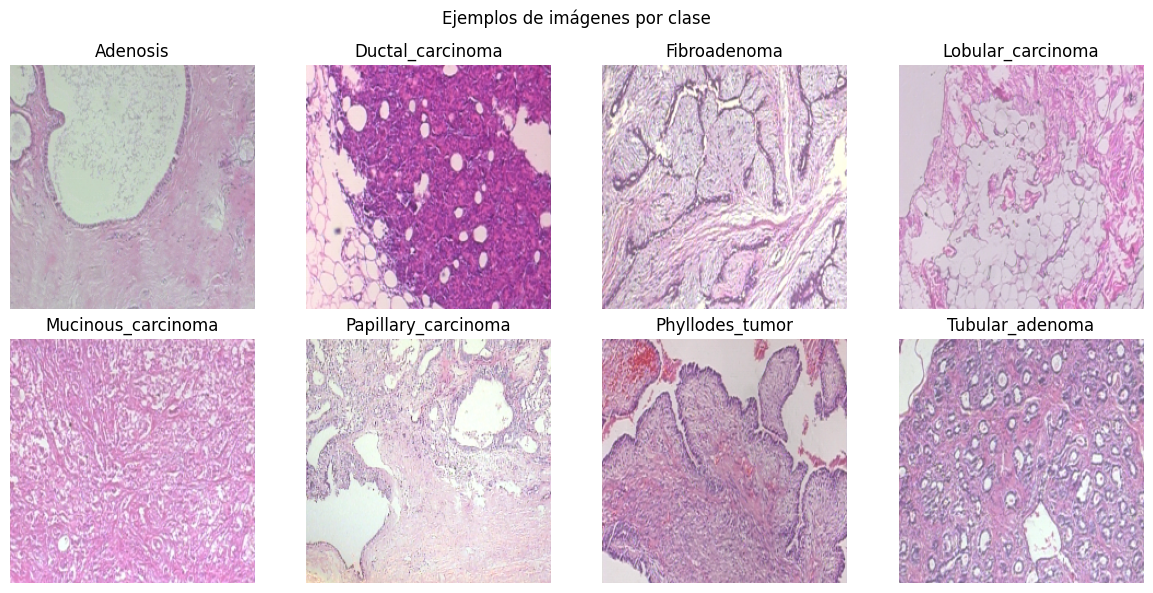

In [ ]:
# import os
# import random
# import matplotlib.pyplot as plt
# from PIL import Image

# # Número de clases
# num_class = len(class_map)
# n_cols = 4
# n_rows = (num_class + n_cols - 1) // n_cols

# plt.figure(figsize=(n_cols * 3, n_rows * 3))

# # Recorrer cada clase por nombre
# for idx, class_name in enumerate(class_map.keys()):
#     class_path = None
#     for group in os.listdir(base_path):
#         group_path = os.path.join(base_path, group)
#         potential_path = os.path.join(group_path, class_name)
#         if os.path.isdir(potential_path):
#             class_path = potential_path
#             break

#     if class_path is None:
#         print(f"No se encontró carpeta para clase {class_name}")
#         continue

#     # Listar imágenes en esa carpeta
#     images = [
#         img for img in os.listdir(class_path)
#         if img.lower().endswith(('.jpg', '.jpeg', '.png'))
#     ]

#     if not images:
#         print(f"No hay imágenes en: {class_path}")
#         continue

#     # Imagen aleatoria
#     imagen_random = random.choice(images)
#     imagen_path = os.path.join(class_path, imagen_random)
#     # print(imagen_path)
#     imagen = Image.open(imagen_path)

#     plt.subplot(n_rows, n_cols, idx + 1)
#     plt.imshow(imagen)
#     plt.title(class_name.capitalize())
#     plt.axis('off')

# plt.suptitle("Ejemplos de imágenes por clase")
# plt.tight_layout()
# plt.show()


## MODELOS CNN

In [2]:
import os
import random
import torch

# ==============================
#  Configuración
# ==============================
base_path = "/content/drive/My Drive/Colab Notebooks/clasificacion multiclase"
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Usando dispositivo:", device)

# ==============================
# Crear lista de imágenes y etiquetas
# ==============================
image_paths = []
labels = []
clases = set()

for carpeta_grupo in os.listdir(base_path):
    ruta_grupo = os.path.join(base_path, carpeta_grupo)
    if not os.path.isdir(ruta_grupo):
        continue
    for nombre_clase in os.listdir(ruta_grupo):
        ruta_clase = os.path.join(ruta_grupo, nombre_clase)
        if os.path.isdir(ruta_clase):
            clases.add(nombre_clase)

clases = sorted(list(clases))
print("Clases encontradas:", clases)
class_map = {nombre: i for i, nombre in enumerate(clases)}

# Guardar imágenes por clase
imagenes_por_clase = {}
for carpeta_grupo in os.listdir(base_path):
    ruta_grupo = os.path.join(base_path, carpeta_grupo)
    if not os.path.isdir(ruta_grupo):
        continue
    for nombre_clase in os.listdir(ruta_grupo):
        ruta_clase = os.path.join(ruta_grupo, nombre_clase)
        if not os.path.isdir(ruta_clase):
            continue
        imagenes = [
            os.path.join(ruta_clase, img)
            for img in os.listdir(ruta_clase)
            if img.lower().endswith((".jpg", ".jpeg", ".png"))
        ]
        if nombre_clase not in imagenes_por_clase:
            imagenes_por_clase[nombre_clase] = []
        imagenes_por_clase[nombre_clase].extend(imagenes)

# Balancear dataset
minimo_imagenes = min(len(lista) for lista in imagenes_por_clase.values())
for clase, lista in imagenes_por_clase.items():
    seleccionadas = random.sample(lista, minimo_imagenes)
    image_paths.extend(seleccionadas)
    labels.extend([class_map[clase]] * minimo_imagenes)

# Verificación final
print(f"\nTotal de imágenes seleccionadas: {len(image_paths)}")
print(f"Total de etiquetas: {len(labels)}")

for clase, idx in class_map.items():
    cantidad = labels.count(idx)
    print(f"Clase '{clase}': {cantidad} imágenes")

Usando dispositivo: cuda
Clases encontradas: ['adenosis', 'ductal_carcinoma', 'fibroadenoma', 'lobular_carcinoma', 'mucinous_carcinoma', 'papillary_carcinoma', 'phyllodes_tumor', 'tubular_adenoma']

Total de imágenes seleccionadas: 3552
Total de etiquetas: 3552
Clase 'adenosis': 444 imágenes
Clase 'ductal_carcinoma': 444 imágenes
Clase 'fibroadenoma': 444 imágenes
Clase 'lobular_carcinoma': 444 imágenes
Clase 'mucinous_carcinoma': 444 imágenes
Clase 'papillary_carcinoma': 444 imágenes
Clase 'phyllodes_tumor': 444 imágenes
Clase 'tubular_adenoma': 444 imágenes


In [3]:
import os
import random
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import torchvision.transforms as transforms
import torch
from torch.utils.data import TensorDataset, DataLoader
from tqdm import tqdm

# ==============================
# Codificar etiquetas y split train/test
# ==============================
le = LabelEncoder()
labels_encoded = le.fit_transform(labels)

train_image_paths, test_image_paths, train_labels, test_labels = train_test_split(
    image_paths, labels_encoded, test_size=0.2, stratify=labels_encoded, random_state=42
)
num_classes = len(le.classes_)
print(f"Número de clases: {num_classes}")

# ==============================
# Transformaciones
# ==============================
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5]*3, std=[0.5]*3)
])


# Cargar y transformar imágenes para train
train_images_ntf = []
for path in tqdm(train_image_paths):
    img = Image.open(path).convert("RGB")
    img_ntf = transform(img)
    train_images_ntf.append(img_ntf)

# Cargar y transformar imágenes para test
test_images_ntf = []
for path in tqdm(test_image_paths):
    img = Image.open(path).convert("RGB")
    img_ntf = transform(img)
    test_images_ntf.append(img_ntf)


Número de clases: 8


100%|██████████| 711/711 [07:43<00:00,  1.54it/s]


In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Usando dispositivo:", device)

# ==================================
# Convertir listas a tensores
# ==================================
# --------------------- SIN Transformaciones  ------------------------
X_train_tensor_ntf = torch.stack(train_images_ntf)
y_train_tensor_ntf = torch.tensor(train_labels, dtype=torch.long)

X_test_tensor_ntf = torch.stack(test_images_ntf)
y_test_tensor_ntf = torch.tensor(test_labels, dtype=torch.long)

# ==================================
# Crear datasets y dataloaders
# ==================================
train_dataset_ntf = TensorDataset(X_train_tensor_ntf, y_train_tensor_ntf)
test_dataset_ntf = TensorDataset(X_test_tensor_ntf, y_test_tensor_ntf)

train_loader_16_ntf = DataLoader(train_dataset_ntf, batch_size=16, shuffle=True, num_workers=2, pin_memory=True)
test_loader_16_ntf = DataLoader(test_dataset_ntf, batch_size=16, shuffle=False, num_workers=2, pin_memory=True)

train_loader_32_ntf = DataLoader(train_dataset_ntf, batch_size=32, shuffle=True, num_workers=2, pin_memory=True)
test_loader_32_ntf= DataLoader(test_dataset_ntf, batch_size=32, shuffle=False, num_workers=2, pin_memory=True)

Usando dispositivo: cuda


## MODEL DenseNet121

### PRUEBA 1a: Dataloader, SIN DATA-AUGMENTATION, CON FINE TUNINIG, batch= 32 OK

In [10]:
import torch
import torch.nn as nn
from torchvision.models import densenet121, DenseNet121_Weights
import os
from PIL import Image
import torchvision.transforms as transforms
from torch.utils.data import TensorDataset, DataLoader
from torchvision import models
import torch.optim as optim
from tqdm import tqdm

# =================================
# Modelo DenseNet121 preentrenado
# =================================
model = densenet121(weights=DenseNet121_Weights.DEFAULT)

# ==============================================================================
# Fine-tuning completo (descongelar capas convolucionales)
# ==============================================================================
# Las capas están descongeladas y se entrenarán.
for param in model.parameters():
    param.requires_grad = True

# Reemplazar la última capa del clasificador
model.classifier = nn.Linear(model.classifier.in_features, num_classes)
print(f"Modelo modificado (última capa): {model.classifier}")
model = model.to(device)

# ==============================================================================
# Función de pérdida y optimizador
# ==============================================================================
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.5)

# ==============================================================================
# Parámetros Early Stopping
# ==============================================================================
patience = 3
min_delta = 0.001
best_val_loss = float("inf")
patience_counter = 0
best_model_wts = None

# ==============================================================================
# Entrenamiento dataloader + Evaluación
# ==============================================================================
epochs = 50

for epoch in range(epochs):
    # ============================== Entrenamiento =============================
    model.train()
    running_loss = 0.0
    for images, labels in tqdm(train_loader_32_ntf, desc=f"Epoch {epoch+1} [Train]", leave=False):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_loss = running_loss / len(train_loader_32_ntf)

    # =============================== Evaluación ===============================
    model.eval()
    val_loss = 0.0
    correct, total = 0, 0
    true_labels_list, pred_labels_list, prob_list = [], [], []

    with torch.no_grad():
        for images, labels in tqdm(test_loader_32_ntf, desc=f"Epoch {epoch+1} [Test]", leave=False):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)

            # Pérdida para early stopping
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            # Probabilidades y predicciones
            probs = torch.softmax(outputs, dim=1)
            preds = torch.argmax(probs, dim=1)

            # Guardar para métricas finales
            true_labels_list.extend(labels.cpu().numpy())
            pred_labels_list.extend(preds.cpu().numpy())
            prob_list.extend(probs.cpu().numpy())

            # Accuracy temporal
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    val_loss /= len(test_loader_32_ntf)
    val_acc = correct / total
    print(f"\rEpoch {epoch+1}: Train Loss={train_loss:.4f}, Test Loss={val_loss:.4f}, Test Acc={val_acc:.4f}")

    # ============================= Early Stopping =============================
    if val_loss < best_val_loss - min_delta:
        best_val_loss = val_loss
        patience_counter = 0
        best_model_wts = model.state_dict()
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print(f"🛑 Early stopping en epoch {epoch+1}")
            break

# =========================
# Restaurar mejores pesos
# =========================
model.load_state_dict(best_model_wts)


Modelo modificado (última capa): Linear(in_features=1024, out_features=8, bias=True)


Epoch 1: Train Loss=1.3224, Test Loss=0.7513, Test Acc=0.7525


Epoch 2: Train Loss=0.4860, Test Loss=0.4519, Test Acc=0.8467


Epoch 3: Train Loss=0.2267, Test Loss=0.3791, Test Acc=0.8608


Epoch 4: Train Loss=0.1402, Test Loss=0.3761, Test Acc=0.8664


Epoch 5: Train Loss=0.0834, Test Loss=0.3614, Test Acc=0.8903


Epoch 6: Train Loss=0.0720, Test Loss=0.4060, Test Acc=0.8664


Epoch 7: Train Loss=0.0452, Test Loss=0.3311, Test Acc=0.8805


Epoch 8: Train Loss=0.0455, Test Loss=0.3743, Test Acc=0.8875


Epoch 9: Train Loss=0.0440, Test Loss=0.3593, Test Acc=0.8903


Epoch 10: Train Loss=0.0420, Test Loss=0.3869, Test Acc=0.8805
🛑 Early stopping en epoch 10


<All keys matched successfully>

In [11]:
# Prueba 1
true_labels_densenet_1a = true_labels_list
pred_labels_densenet_1a = pred_labels_list
prob_densenet_1a = prob_list

In [12]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

acc_densenet_1a = accuracy_score(true_labels_densenet_1a, pred_labels_densenet_1a)
error_rate_densenet_1a = 1 - acc_densenet_1a
print(f"Accuracy total: {acc_densenet_1a:.4f}, Error rate: {error_rate_densenet_1a:.4f}\n")

print(classification_report(
    true_labels_densenet_1a,
    pred_labels_densenet_1a,
    labels=list(range(len(class_map))),
    target_names=class_map.keys(),
    zero_division=0
))

Accuracy total: 0.8805, Error rate: 0.1195

                     precision    recall  f1-score   support

           adenosis       0.95      0.84      0.89        89
   ductal_carcinoma       0.90      0.75      0.82        88
       fibroadenoma       0.88      0.88      0.88        89
  lobular_carcinoma       0.76      0.85      0.80        89
 mucinous_carcinoma       0.87      0.90      0.88        89
papillary_carcinoma       0.93      0.94      0.94        89
    phyllodes_tumor       0.86      0.90      0.88        89
    tubular_adenoma       0.92      0.98      0.95        89

           accuracy                           0.88       711
          macro avg       0.88      0.88      0.88       711
       weighted avg       0.88      0.88      0.88       711



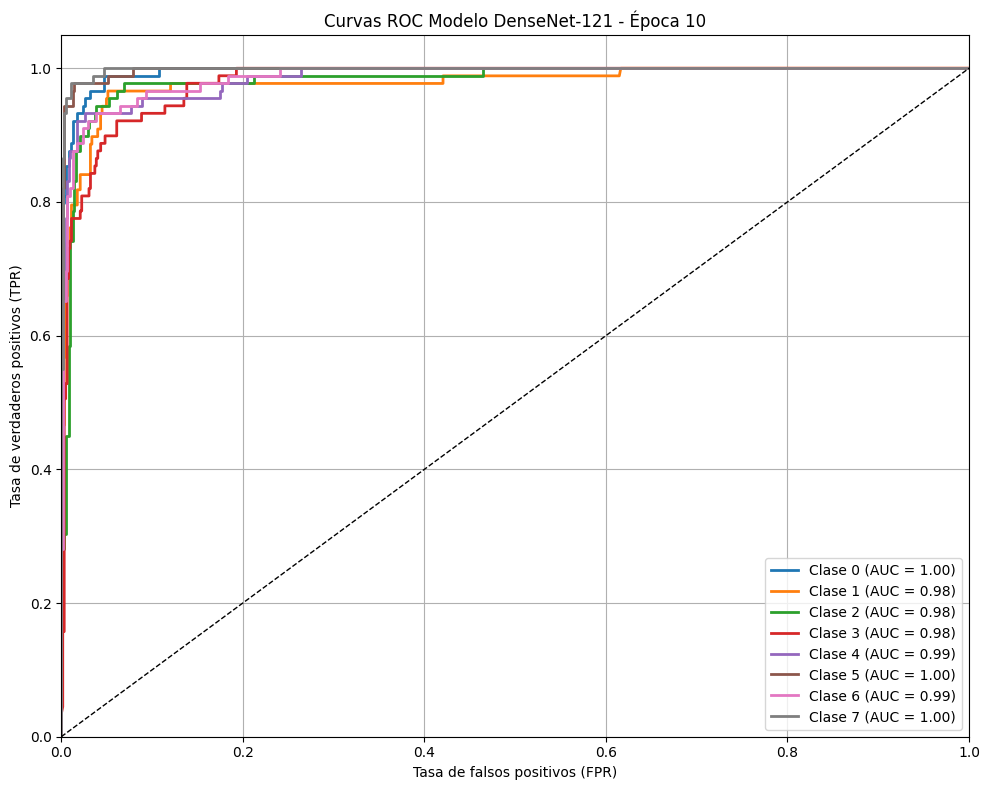

In [13]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Binariza etiquetas verdaderas (one-hot)
y_true_bin = label_binarize(true_labels_densenet_1a, classes=list(range(num_classes)))
y_score = np.array(prob_densenet_1a)

# Curva ROC por clase
plt.figure(figsize=(10, 8))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"Clase {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Tasa de falsos positivos (FPR)")
plt.ylabel("Tasa de verdaderos positivos (TPR)")
plt.title(f"Curvas ROC Modelo DenseNet-121 - Época {epoch+1}")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


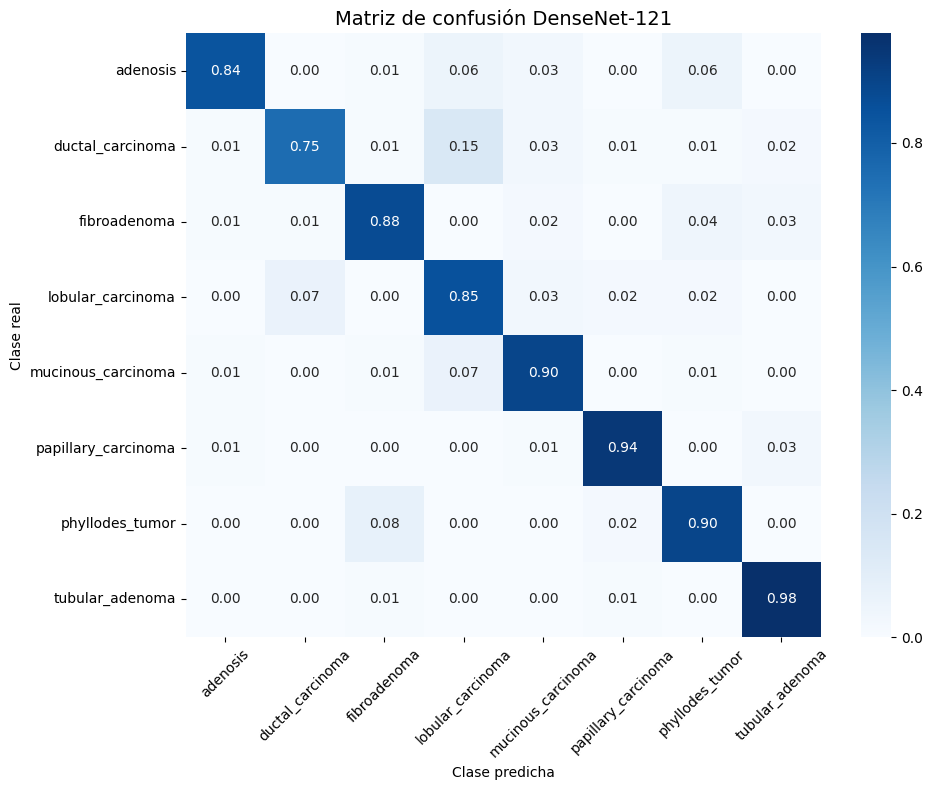

In [14]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true_labels_densenet_1a, pred_labels_densenet_1a)
cm_norm = cm.astype('float') / (cm.sum(axis=1, keepdims=True) + 1e-6)  # normalizar por fila

# Visualizar matriz normalizada
plt.figure(figsize=(10,8))
sns.heatmap(cm_norm, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=list(class_map.keys()), yticklabels=list(class_map.keys()))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Matriz de confusión DenseNet-121", fontsize=14)
plt.xlabel("Clase predicha")
plt.ylabel("Clase real")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



### PRUEBA 1b: Dataloader, SIN DATA-AUGMENTATION, CON FINE TUNINIG, batch= 16 OK

In [15]:
import torch
import torch.nn as nn
from torchvision.models import densenet121, DenseNet121_Weights
import os
from PIL import Image
import torchvision.transforms as transforms
from torch.utils.data import TensorDataset, DataLoader
from torchvision import models
import torch.optim as optim
from tqdm import tqdm

# =================================
# Modelo DenseNet121 preentrenado
# =================================
model = densenet121(weights=DenseNet121_Weights.DEFAULT)

# ==============================================================================
# Fine-tuning completo (descongelar capas convolucionales)
# ==============================================================================
# Las capas están descongeladas y se entrenarán.
for param in model.parameters():
    param.requires_grad = True

# Reemplazar la última capa del clasificador
model.classifier = nn.Linear(model.classifier.in_features, num_classes)
print(f"Modelo modificado (última capa): {model.classifier}")
model = model.to(device)

# ==============================================================================
# Función de pérdida y optimizador
# ==============================================================================
criterion = nn.CrossEntropyLoss()
# Se optimizan todas las capas
optimizer = optim.Adam(model.parameters(), lr=1e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.5)

# ==============================================================================
# Parámetros Early Stopping
# ==============================================================================
patience = 3
min_delta = 0.001
best_val_loss = float("inf")
patience_counter = 0
best_model_wts = None

# ==============================================================================
# Entrenamiento dataloader + Evaluación
# ==============================================================================
epochs = 50

for epoch in range(epochs):
    # ============================== Entrenamiento =============================
    model.train()
    running_loss = 0.0
    for images, labels in tqdm(train_loader_16_ntf, desc=f"Epoch {epoch+1} [Train]", leave=False):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_loss = running_loss / len(train_loader_16_ntf)

    # =============================== Evaluación ===============================
    model.eval()
    val_loss = 0.0
    correct, total = 0, 0
    true_labels_list, pred_labels_list, prob_list = [], [], []

    with torch.no_grad():
        for images, labels in tqdm(test_loader_16_ntf, desc=f"Epoch {epoch+1} [Test]", leave=False):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)

            # Pérdida para early stopping
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            # Probabilidades y predicciones
            probs = torch.softmax(outputs, dim=1)
            preds = torch.argmax(probs, dim=1)

            # Guardar para métricas finales
            true_labels_list.extend(labels.cpu().numpy())
            pred_labels_list.extend(preds.cpu().numpy())
            prob_list.extend(probs.cpu().numpy())

            # Accuracy temporal
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    val_loss /= len(test_loader_16_ntf)
    val_acc = correct / total
    print(f"\rEpoch {epoch+1}: Train Loss={train_loss:.4f}, Test Loss={val_loss:.4f}, Test Acc={val_acc:.4f}")

    # ============================= Early Stopping =============================
    if val_loss < best_val_loss - min_delta:
        best_val_loss = val_loss
        patience_counter = 0
        best_model_wts = model.state_dict()
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print(f"🛑 Early stopping en epoch {epoch+1}")
            break

# =========================
# Restaurar mejores pesos
# =========================
model.load_state_dict(best_model_wts)


Modelo modificado (última capa): Linear(in_features=1024, out_features=8, bias=True)


Epoch 1: Train Loss=1.2530, Test Loss=0.6449, Test Acc=0.7792


Epoch 2: Train Loss=0.5486, Test Loss=0.4432, Test Acc=0.8397


Epoch 3: Train Loss=0.3145, Test Loss=0.3903, Test Acc=0.8523


Epoch 4: Train Loss=0.1982, Test Loss=0.3746, Test Acc=0.8720


Epoch 5: Train Loss=0.1416, Test Loss=0.2846, Test Acc=0.8987


Epoch 6: Train Loss=0.1063, Test Loss=0.3494, Test Acc=0.8847


Epoch 7: Train Loss=0.1008, Test Loss=0.3540, Test Acc=0.8706


Epoch 8: Train Loss=0.0905, Test Loss=0.3514, Test Acc=0.8790
🛑 Early stopping en epoch 8


<All keys matched successfully>

In [16]:
# Prueba 1
true_labels_densenet_1b = true_labels_list
pred_labels_densenet_1b = pred_labels_list
prob_densenet_1b = prob_list

In [17]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

acc_densenet_1b = accuracy_score(true_labels_densenet_1b, pred_labels_densenet_1b)
error_rate_densenet_1b = 1 - acc_densenet_1b
print(f"Accuracy total: {acc_densenet_1b:.4f}, Error rate: {error_rate_densenet_1b:.4f}\n")

print(classification_report(
    true_labels_densenet_1b,
    pred_labels_densenet_1b,
    labels=list(range(len(class_map))),
    target_names=class_map.keys(),
    zero_division=0
))

Accuracy total: 0.8790, Error rate: 0.1210

                     precision    recall  f1-score   support

           adenosis       0.94      0.94      0.94        89
   ductal_carcinoma       0.73      0.88      0.80        88
       fibroadenoma       0.84      0.91      0.87        89
  lobular_carcinoma       0.90      0.78      0.83        89
 mucinous_carcinoma       0.91      0.84      0.88        89
papillary_carcinoma       0.95      0.92      0.94        89
    phyllodes_tumor       0.83      0.84      0.84        89
    tubular_adenoma       0.96      0.92      0.94        89

           accuracy                           0.88       711
          macro avg       0.88      0.88      0.88       711
       weighted avg       0.88      0.88      0.88       711



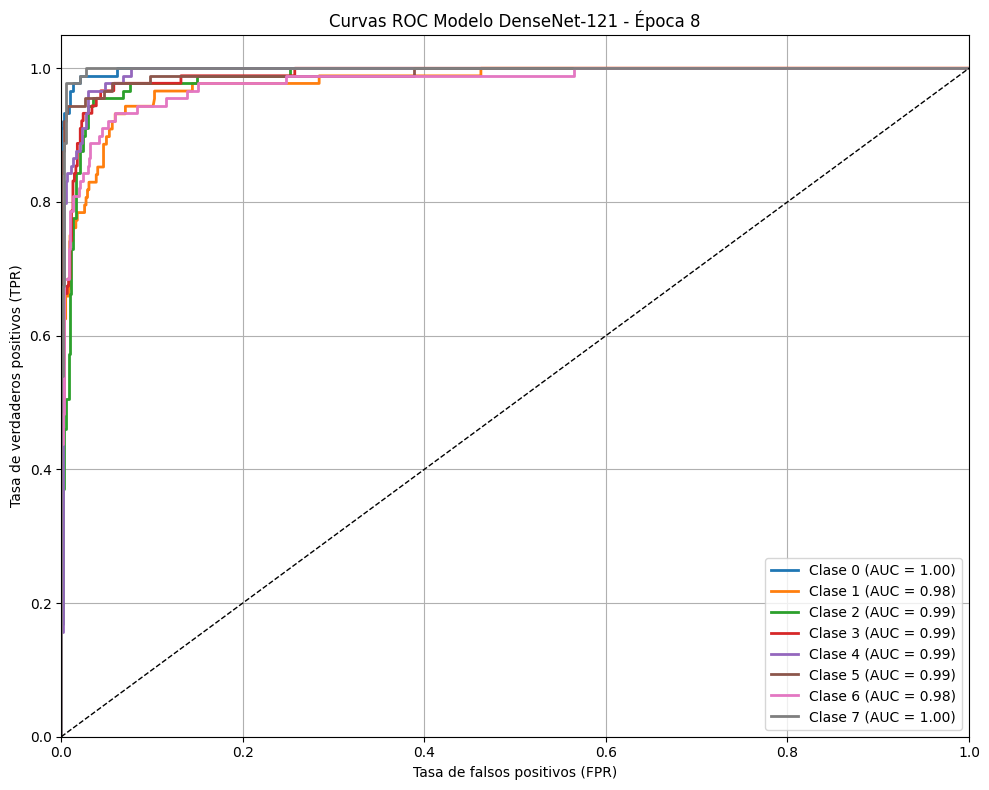

In [18]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Binariza etiquetas verdaderas (one-hot)
y_true_bin = label_binarize(true_labels_densenet_1b, classes=list(range(num_classes)))
y_score = np.array(prob_densenet_1b)

# Curva ROC por clase
plt.figure(figsize=(10, 8))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"Clase {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Tasa de falsos positivos (FPR)")
plt.ylabel("Tasa de verdaderos positivos (TPR)")
plt.title(f"Curvas ROC Modelo DenseNet-121 - Época {epoch+1}")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


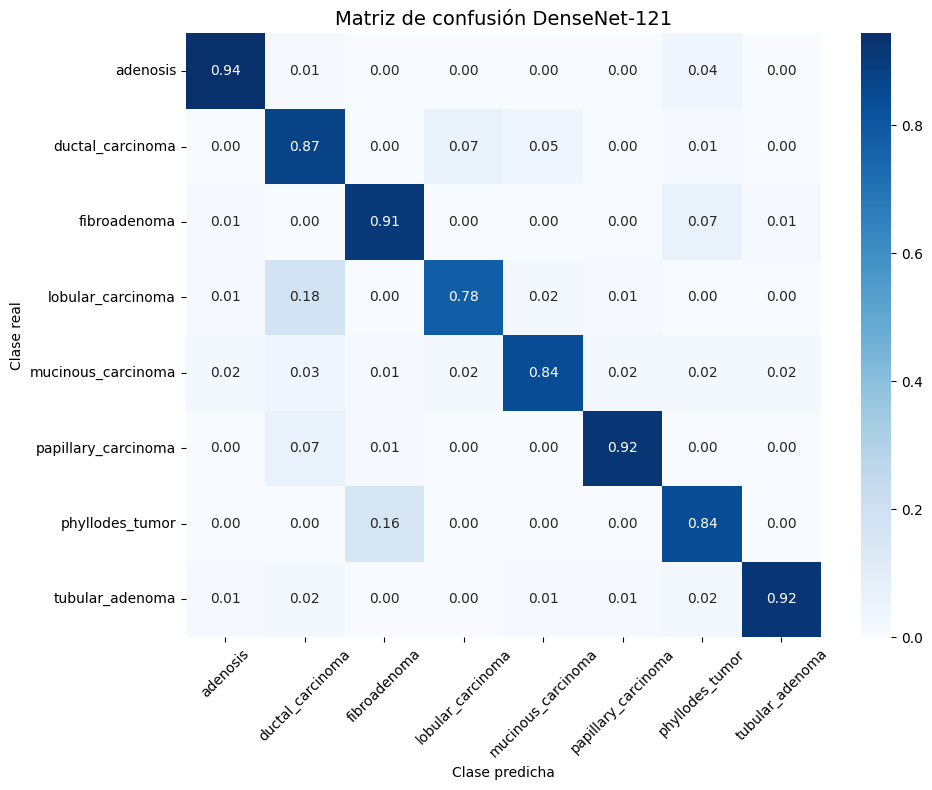

In [19]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true_labels_densenet_1b, pred_labels_densenet_1b)
cm_norm = cm.astype('float') / (cm.sum(axis=1, keepdims=True) + 1e-6)  # normalizar por fila

# Visualizar matriz normalizada
plt.figure(figsize=(10,8))
sns.heatmap(cm_norm, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=list(class_map.keys()), yticklabels=list(class_map.keys()))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Matriz de confusión DenseNet-121", fontsize=14)
plt.xlabel("Clase predicha")
plt.ylabel("Clase real")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



### PRUEBA 2a: Dataloader, SIN FINE TUNINIG, SIN DATA-AUGMENTATION, batch= 32 OK

In [20]:
import torch
import torch.nn as nn
from torchvision.models import densenet121, DenseNet121_Weights
import os
from PIL import Image
import torchvision.transforms as transforms
from torch.utils.data import TensorDataset, DataLoader
from torchvision import models
import torch.optim as optim
from tqdm import tqdm

# =================================
# Modelo DenseNet121 preentrenado
# =================================
model = densenet121(weights=DenseNet121_Weights.DEFAULT)

# ==============================================================================
# Sin fine-tuning (congelar capas convolucionales)
# ==============================================================================
# Solo las capas convolucionales
for param in model.features.parameters():
    param.requires_grad = False

# Reemplazar la última capa del clasificador
model.classifier = nn.Linear(model.classifier.in_features, num_classes)
print(f"Modelo modificado (última capa): {model.classifier}")
model = model.to(device)

# ==============================================================================
# Función de pérdida y optimizador
# ==============================================================================
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.classifier.parameters(), lr=1e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.5)

# ==============================================================================
# Parámetros Early Stopping
# ==============================================================================
patience = 3
min_delta = 0.001
best_val_loss = float("inf")
patience_counter = 0
best_model_wts = None

# ==============================================================================
# Entrenamiento dataloader + Evaluación
# ==============================================================================
epochs = 50

for epoch in range(epochs):
    # ============================== Entrenamiento =============================
    model.train()
    running_loss = 0.0
    for images, labels in tqdm(train_loader_32_ntf, desc=f"Epoch {epoch+1} [Train]", leave=False):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_loss = running_loss / len(train_loader_32_ntf)

    # =============================== Evaluación ===============================
    model.eval()
    val_loss = 0.0
    correct, total = 0, 0
    true_labels_list, pred_labels_list, prob_list = [], [], []

    with torch.no_grad():
        for images, labels in tqdm(test_loader_32_ntf, desc=f"Epoch {epoch+1} [Test]", leave=False):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)

            # Pérdida para early stopping
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            # Probabilidades y predicciones
            probs = torch.softmax(outputs, dim=1)
            preds = torch.argmax(probs, dim=1)

            # Guardar para métricas finales
            true_labels_list.extend(labels.cpu().numpy())
            pred_labels_list.extend(preds.cpu().numpy())
            prob_list.extend(probs.cpu().numpy())

            # Accuracy temporal
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    val_loss /= len(test_loader_32_ntf)
    val_acc = correct / total
    print(f"\rEpoch {epoch+1}: Train Loss={train_loss:.4f}, Test Loss={val_loss:.4f}, Test Acc={val_acc:.4f}")

    # ============================= Early Stopping =============================
    if val_loss < best_val_loss - min_delta:
        best_val_loss = val_loss
        patience_counter = 0
        best_model_wts = model.state_dict()
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print(f"🛑 Early stopping en epoch {epoch+1}")
            break

# =========================
# Restaurar mejores pesos
# =========================
model.load_state_dict(best_model_wts)


Modelo modificado (última capa): Linear(in_features=1024, out_features=8, bias=True)


Epoch 1: Train Loss=2.0719, Test Loss=2.0058, Test Acc=0.2096


Epoch 2: Train Loss=1.9438, Test Loss=1.8995, Test Acc=0.3010


Epoch 3: Train Loss=1.8438, Test Loss=1.8055, Test Acc=0.3572


Epoch 4: Train Loss=1.7478, Test Loss=1.7269, Test Acc=0.4065


Epoch 5: Train Loss=1.6764, Test Loss=1.6623, Test Acc=0.4360


Epoch 6: Train Loss=1.6113, Test Loss=1.6015, Test Acc=0.4613


Epoch 7: Train Loss=1.5532, Test Loss=1.5539, Test Acc=0.4726


Epoch 8: Train Loss=1.5068, Test Loss=1.5081, Test Acc=0.4979


Epoch 9: Train Loss=1.4719, Test Loss=1.4724, Test Acc=0.5091


Epoch 10: Train Loss=1.4224, Test Loss=1.4326, Test Acc=0.5134


Epoch 11: Train Loss=1.3936, Test Loss=1.4039, Test Acc=0.5190


Epoch 12: Train Loss=1.3603, Test Loss=1.3787, Test Acc=0.5232


Epoch 13: Train Loss=1.3251, Test Loss=1.3521, Test Acc=0.5471


Epoch 14: Train Loss=1.2950, Test Loss=1.3327, Test Acc=0.5443


Epoch 15: Train Loss=1.2829, Test Loss=1.3054, Test Acc=0.5612


Epoch 16: Train Loss=1.2593, Test Loss=1.2880, Test Acc=0.5556


Epoch 17: Train Loss=1.2263, Test Loss=1.2598, Test Acc=0.5837


Epoch 18: Train Loss=1.2136, Test Loss=1.2420, Test Acc=0.5710


Epoch 19: Train Loss=1.2003, Test Loss=1.2310, Test Acc=0.5738


Epoch 20: Train Loss=1.1722, Test Loss=1.2170, Test Acc=0.5851


Epoch 21: Train Loss=1.1618, Test Loss=1.1905, Test Acc=0.6090


Epoch 22: Train Loss=1.1488, Test Loss=1.1816, Test Acc=0.6076


Epoch 23: Train Loss=1.1211, Test Loss=1.1660, Test Acc=0.6104


Epoch 24: Train Loss=1.1205, Test Loss=1.1581, Test Acc=0.6006


Epoch 25: Train Loss=1.0998, Test Loss=1.1508, Test Acc=0.6287


Epoch 26: Train Loss=1.0898, Test Loss=1.1289, Test Acc=0.6188


Epoch 27: Train Loss=1.0779, Test Loss=1.1264, Test Acc=0.6217


Epoch 28: Train Loss=1.0667, Test Loss=1.1135, Test Acc=0.6329


Epoch 29: Train Loss=1.0527, Test Loss=1.1091, Test Acc=0.6273


Epoch 30: Train Loss=1.0482, Test Loss=1.0927, Test Acc=0.6287


Epoch 31: Train Loss=1.0289, Test Loss=1.0838, Test Acc=0.6371


Epoch 32: Train Loss=1.0228, Test Loss=1.0706, Test Acc=0.6470


Epoch 33: Train Loss=1.0110, Test Loss=1.0629, Test Acc=0.6399


Epoch 34: Train Loss=1.0014, Test Loss=1.0647, Test Acc=0.6442


Epoch 35: Train Loss=0.9977, Test Loss=1.0504, Test Acc=0.6428


Epoch 36: Train Loss=0.9940, Test Loss=1.0505, Test Acc=0.6512


Epoch 37: Train Loss=0.9754, Test Loss=1.0373, Test Acc=0.6484


Epoch 38: Train Loss=0.9779, Test Loss=1.0212, Test Acc=0.6554


Epoch 39: Train Loss=0.9592, Test Loss=1.0291, Test Acc=0.6554


Epoch 40: Train Loss=0.9525, Test Loss=1.0110, Test Acc=0.6653


Epoch 41: Train Loss=0.9414, Test Loss=1.0085, Test Acc=0.6554


Epoch 42: Train Loss=0.9336, Test Loss=1.0050, Test Acc=0.6540


Epoch 43: Train Loss=0.9442, Test Loss=0.9969, Test Acc=0.6681


Epoch 44: Train Loss=0.9231, Test Loss=0.9926, Test Acc=0.6568


Epoch 45: Train Loss=0.9165, Test Loss=0.9956, Test Acc=0.6624


Epoch 46: Train Loss=0.9080, Test Loss=0.9910, Test Acc=0.6596


Epoch 47: Train Loss=0.9031, Test Loss=0.9811, Test Acc=0.6624


Epoch 48: Train Loss=0.9005, Test Loss=0.9725, Test Acc=0.6667


Epoch 49: Train Loss=0.8890, Test Loss=0.9703, Test Acc=0.6681


Epoch 50: Train Loss=0.8860, Test Loss=0.9694, Test Acc=0.6723


<All keys matched successfully>

In [23]:
# Prueba 2
true_labels_densenet_2a = true_labels_list
pred_labels_densenet_2a = pred_labels_list
prob_densenet_2a = prob_list

In [24]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

acc_densenet_2a = accuracy_score(true_labels_densenet_2a, pred_labels_densenet_2a)
error_rate_densenet_2a = 1 - acc_densenet_2a
print(f"Accuracy total: {acc_densenet_2a:.4f}, Error rate: {error_rate_densenet_2a:.4f}\n")

print(classification_report(
    true_labels_densenet_2a,
    pred_labels_densenet_2a,
    labels=list(range(len(class_map))),
    target_names=class_map.keys(),
    zero_division=0
))

Accuracy total: 0.6723, Error rate: 0.3277

                     precision    recall  f1-score   support

           adenosis       0.78      0.81      0.80        89
   ductal_carcinoma       0.63      0.55      0.59        88
       fibroadenoma       0.62      0.56      0.59        89
  lobular_carcinoma       0.63      0.71      0.67        89
 mucinous_carcinoma       0.63      0.60      0.61        89
papillary_carcinoma       0.65      0.72      0.68        89
    phyllodes_tumor       0.65      0.66      0.66        89
    tubular_adenoma       0.77      0.78      0.77        89

           accuracy                           0.67       711
          macro avg       0.67      0.67      0.67       711
       weighted avg       0.67      0.67      0.67       711



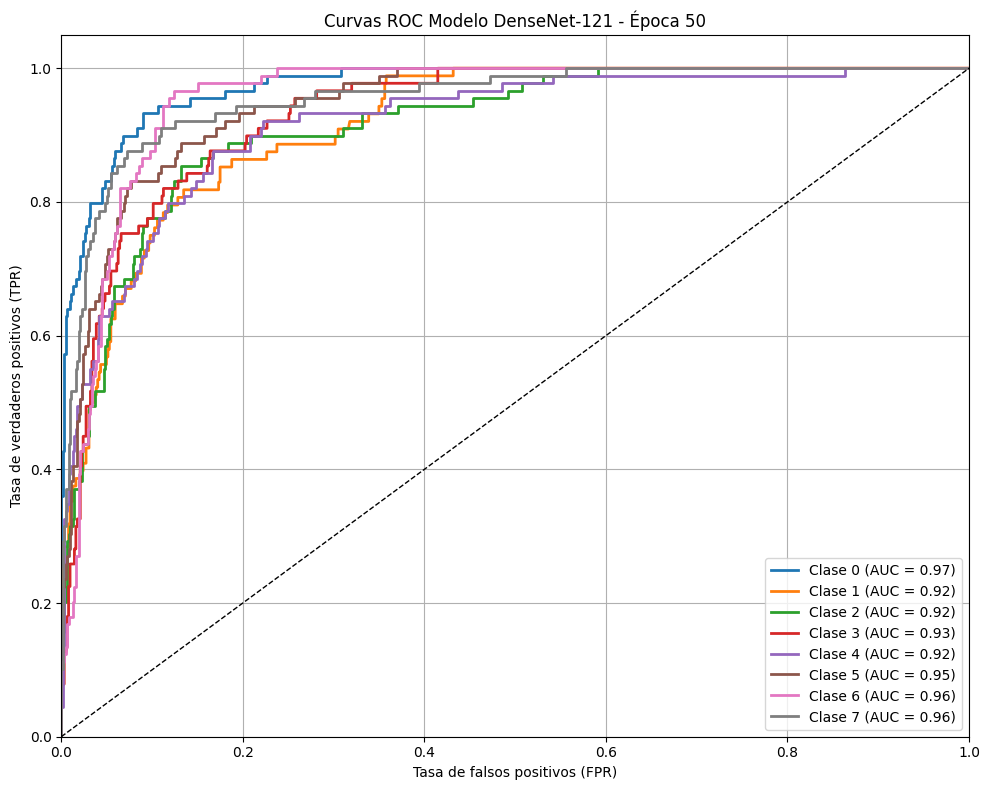

In [26]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Binariza etiquetas verdaderas (one-hot)
y_true_bin = label_binarize(true_labels_densenet_2a, classes=list(range(num_classes)))
y_score = np.array(prob_densenet_2a)

# Curva ROC por clase
plt.figure(figsize=(10, 8))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"Clase {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Tasa de falsos positivos (FPR)")
plt.ylabel("Tasa de verdaderos positivos (TPR)")
plt.title(f"Curvas ROC Modelo DenseNet-121 - Época {epoch+1}")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


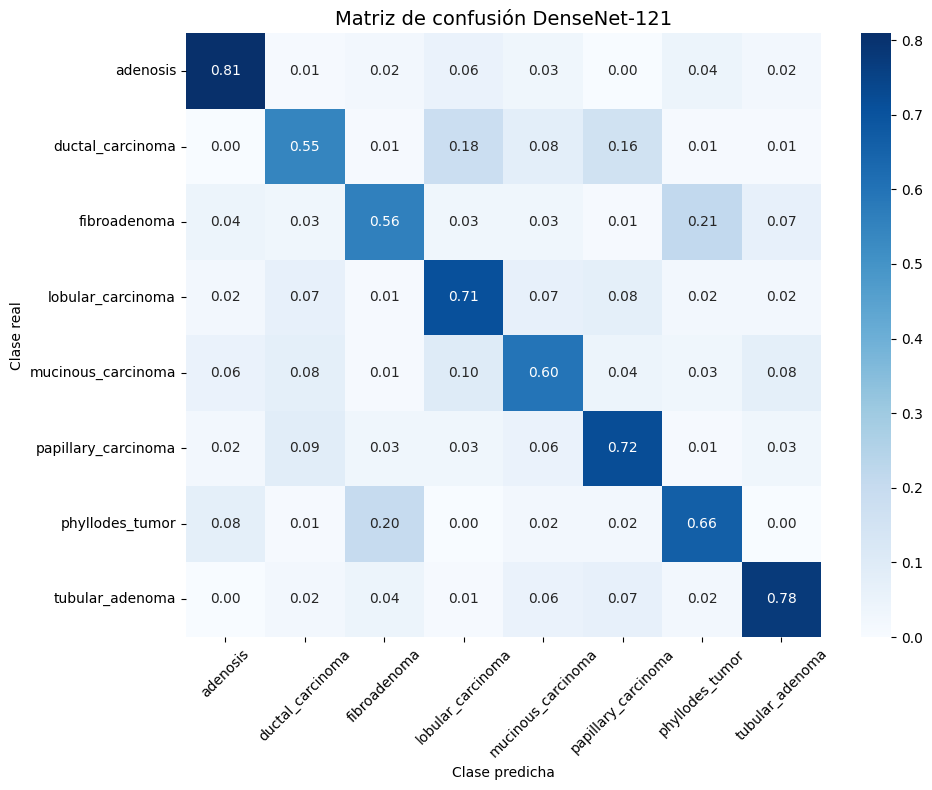

In [27]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true_labels_densenet_2a, pred_labels_densenet_2a)
cm_norm = cm.astype('float') / (cm.sum(axis=1, keepdims=True) + 1e-6)  # normalizar por fila

# Visualizar matriz normalizada
plt.figure(figsize=(10,8))
sns.heatmap(cm_norm, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=list(class_map.keys()), yticklabels=list(class_map.keys()))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Matriz de confusión DenseNet-121", fontsize=14)
plt.xlabel("Clase predicha")
plt.ylabel("Clase real")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


### PRUEBA 2b: Dataloader, SIN DATA-AUGMENTATION, SIN FINE TUNINIG, batch= 16 OK

In [29]:
import torch
import torch.nn as nn
from torchvision.models import densenet121, DenseNet121_Weights
import os
from PIL import Image
import torchvision.transforms as transforms
from torch.utils.data import TensorDataset, DataLoader
from torchvision import models
import torch.optim as optim
from tqdm import tqdm

# =================================
# Modelo DenseNet121 preentrenado
# =================================
model = densenet121(weights=DenseNet121_Weights.DEFAULT)

# ==============================================================================
# Sin fine-tuning (congelar capas convolucionales)
# ==============================================================================
# Solo las capas convolucionales
for param in model.features.parameters():
    param.requires_grad = False

# Reemplazar la última capa del clasificador
model.classifier = nn.Linear(model.classifier.in_features, num_classes)
print(f"Modelo modificado (última capa): {model.classifier}")
model = model.to(device)

# ==============================================================================
# Función de pérdida y optimizador
# ==============================================================================
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.classifier.parameters(), lr=1e-4)
# optimizer = optim.Adam(model.parameters(), lr=1e-4) MAAAL?
# optimizer = optim.Adam(model.parameters(), lr=5e-5, weight_decay=0.001)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.5)

# ==============================================================================
# Parámetros Early Stopping
# ==============================================================================
patience = 3
min_delta = 0.001
best_val_loss = float("inf")
patience_counter = 0
best_model_wts = None

# ==============================================================================
# Entrenamiento dataloader + Evaluación
# ==============================================================================
epochs = 50

for epoch in range(epochs):
    # ============================== Entrenamiento =============================
    model.train()
    running_loss = 0.0
    for images, labels in tqdm(train_loader_16_ntf, desc=f"Epoch {epoch+1} [Train]", leave=False):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_loss = running_loss / len(train_loader_16_ntf)

    # =============================== Evaluación ===============================
    model.eval()
    val_loss = 0.0
    correct, total = 0, 0
    true_labels_list, pred_labels_list, prob_list = [], [], []

    with torch.no_grad():
        for images, labels in tqdm(test_loader_16_ntf, desc=f"Epoch {epoch+1} [Test]", leave=False):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)

            # Pérdida para early stopping
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            # Probabilidades y predicciones
            probs = torch.softmax(outputs, dim=1)
            preds = torch.argmax(probs, dim=1)

            # Guardar para métricas finales
            true_labels_list.extend(labels.cpu().numpy())
            pred_labels_list.extend(preds.cpu().numpy())
            prob_list.extend(probs.cpu().numpy())

            # Accuracy temporal
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    val_loss /= len(test_loader_16_ntf)
    val_acc = correct / total
    print(f"\rEpoch {epoch+1}: Train Loss={train_loss:.4f}, Test Loss={val_loss:.4f}, Test Acc={val_acc:.4f}")

    # ============================= Early Stopping =============================
    if val_loss < best_val_loss - min_delta:
        best_val_loss = val_loss
        patience_counter = 0
        best_model_wts = model.state_dict()
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print(f"🛑 Early stopping en epoch {epoch+1}")
            break

# =========================
# Restaurar mejores pesos
# =========================
model.load_state_dict(best_model_wts)


Modelo modificado (última capa): Linear(in_features=1024, out_features=8, bias=True)


Epoch 1: Train Loss=2.0500, Test Loss=1.9628, Test Acc=0.2377


Epoch 2: Train Loss=1.8966, Test Loss=1.8228, Test Acc=0.3418


Epoch 3: Train Loss=1.7699, Test Loss=1.7112, Test Acc=0.4037


Epoch 4: Train Loss=1.6695, Test Loss=1.6237, Test Acc=0.4459


Epoch 5: Train Loss=1.5990, Test Loss=1.5461, Test Acc=0.4923


Epoch 6: Train Loss=1.5312, Test Loss=1.5050, Test Acc=0.4824


Epoch 7: Train Loss=1.4801, Test Loss=1.4447, Test Acc=0.5148


Epoch 8: Train Loss=1.4312, Test Loss=1.3951, Test Acc=0.5345


Epoch 9: Train Loss=1.3886, Test Loss=1.3561, Test Acc=0.5471


Epoch 10: Train Loss=1.3620, Test Loss=1.3256, Test Acc=0.5541


Epoch 11: Train Loss=1.3287, Test Loss=1.2953, Test Acc=0.5401


Epoch 12: Train Loss=1.2973, Test Loss=1.2726, Test Acc=0.5781


Epoch 13: Train Loss=1.2732, Test Loss=1.2543, Test Acc=0.5823


Epoch 14: Train Loss=1.2430, Test Loss=1.2179, Test Acc=0.5865


Epoch 15: Train Loss=1.2252, Test Loss=1.1896, Test Acc=0.6020


Epoch 16: Train Loss=1.1999, Test Loss=1.1795, Test Acc=0.6048


Epoch 17: Train Loss=1.1875, Test Loss=1.1572, Test Acc=0.6174


Epoch 18: Train Loss=1.1610, Test Loss=1.1372, Test Acc=0.6259


Epoch 19: Train Loss=1.1441, Test Loss=1.1443, Test Acc=0.6090


Epoch 20: Train Loss=1.1352, Test Loss=1.1194, Test Acc=0.6371


Epoch 21: Train Loss=1.1157, Test Loss=1.1044, Test Acc=0.6399


Epoch 22: Train Loss=1.1137, Test Loss=1.0901, Test Acc=0.6231


Epoch 23: Train Loss=1.1028, Test Loss=1.0832, Test Acc=0.6329


Epoch 24: Train Loss=1.0770, Test Loss=1.0741, Test Acc=0.6343


Epoch 25: Train Loss=1.0756, Test Loss=1.0483, Test Acc=0.6540


Epoch 26: Train Loss=1.0556, Test Loss=1.0438, Test Acc=0.6667


Epoch 27: Train Loss=1.0475, Test Loss=1.0424, Test Acc=0.6414


Epoch 28: Train Loss=1.0362, Test Loss=1.0246, Test Acc=0.6667


Epoch 29: Train Loss=1.0391, Test Loss=1.0203, Test Acc=0.6498


Epoch 30: Train Loss=1.0126, Test Loss=1.0145, Test Acc=0.6568


Epoch 31: Train Loss=0.9791, Test Loss=0.9988, Test Acc=0.6681


Epoch 32: Train Loss=1.0018, Test Loss=0.9978, Test Acc=0.6709


Epoch 33: Train Loss=0.9830, Test Loss=0.9986, Test Acc=0.6793


Epoch 34: Train Loss=0.9746, Test Loss=0.9997, Test Acc=0.6667
🛑 Early stopping en epoch 34


<All keys matched successfully>

In [30]:
# Prueba 2
true_labels_densenet_2b = true_labels_list
pred_labels_densenet_2b = pred_labels_list
prob_densenet_2b = prob_list

In [31]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

acc_densenet_2b = accuracy_score(true_labels_densenet_2b, pred_labels_densenet_2b)
error_rate_densenet_2b = 1 - acc_densenet_2b
print(f"Accuracy total: {acc_densenet_2b:.4f}, Error rate: {error_rate_densenet_2b:.4f}\n")

print(classification_report(
    true_labels_densenet_2b,
    pred_labels_densenet_2b,
    labels=list(range(len(class_map))),
    target_names=class_map.keys(),
    zero_division=0
))

Accuracy total: 0.6667, Error rate: 0.3333

                     precision    recall  f1-score   support

           adenosis       0.81      0.74      0.78        89
   ductal_carcinoma       0.60      0.59      0.59        88
       fibroadenoma       0.73      0.49      0.59        89
  lobular_carcinoma       0.65      0.66      0.66        89
 mucinous_carcinoma       0.56      0.70      0.62        89
papillary_carcinoma       0.65      0.62      0.64        89
    phyllodes_tumor       0.64      0.74      0.69        89
    tubular_adenoma       0.74      0.79      0.77        89

           accuracy                           0.67       711
          macro avg       0.67      0.67      0.67       711
       weighted avg       0.67      0.67      0.67       711



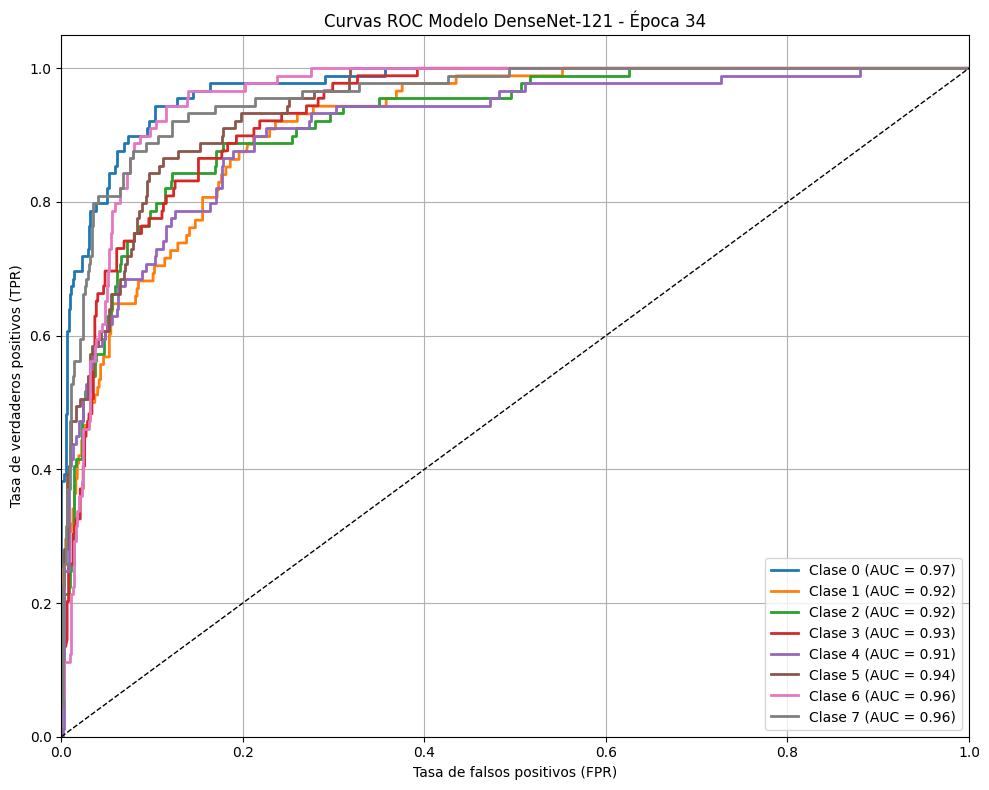

In [32]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Binariza etiquetas verdaderas (one-hot)
y_true_bin = label_binarize(true_labels_densenet_2b, classes=list(range(num_classes)))
y_score = np.array(prob_densenet_2b)

# Curva ROC por clase
plt.figure(figsize=(10, 8))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"Clase {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Tasa de falsos positivos (FPR)")
plt.ylabel("Tasa de verdaderos positivos (TPR)")
plt.title(f"Curvas ROC Modelo DenseNet-121 - Época {epoch+1}")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


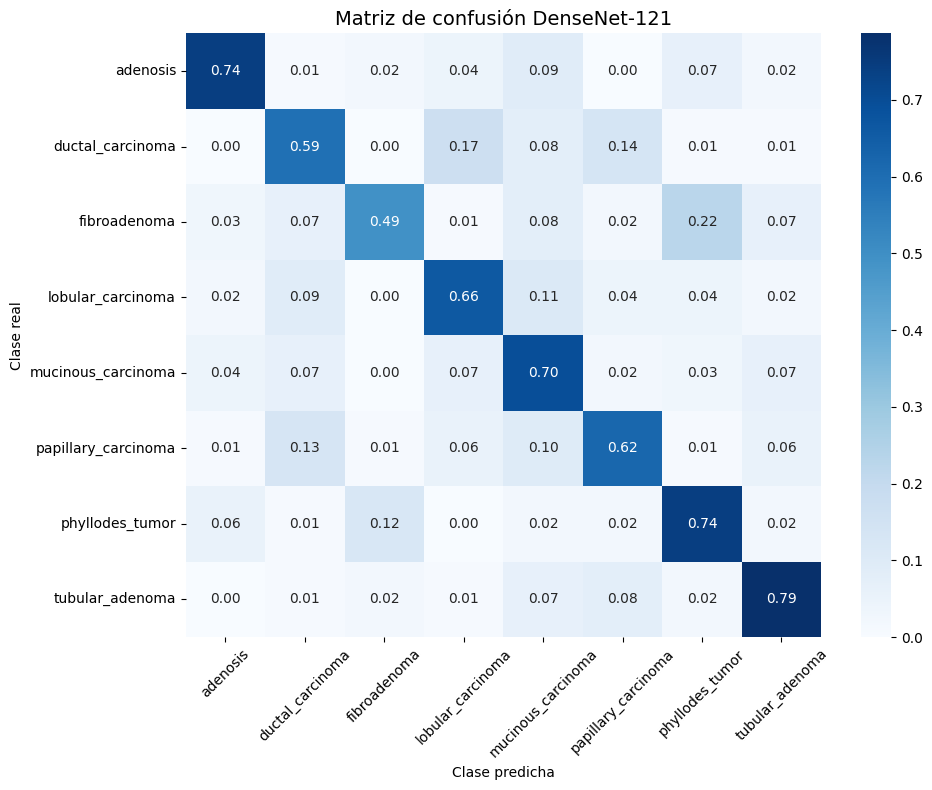

In [33]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true_labels_densenet_2b, pred_labels_densenet_2b)
cm_norm = cm.astype('float') / (cm.sum(axis=1, keepdims=True) + 1e-6)  # normalizar por fila

# Visualizar matriz normalizada
plt.figure(figsize=(10,8))
sns.heatmap(cm_norm, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=list(class_map.keys()), yticklabels=list(class_map.keys()))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Matriz de confusión DenseNet-121", fontsize=14)
plt.xlabel("Clase predicha")
plt.ylabel("Clase real")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


### PRUEBA 3a: batch-loading, SIN DATA-AUGMENTATION, CON FINE TUNNING, batch= 32 OK

In [ ]:
import torch
import torch.nn as nn
from torchvision.models import densenet121, DenseNet121_Weights
import os
from PIL import Image
import torchvision.transforms as transforms
from torch.utils.data import TensorDataset, DataLoader
from torchvision import models
import torch.optim as optim
from tqdm import tqdm
from random import shuffle

# =================================
# Modelo DenseNet121 preentrenado
# =================================
model = densenet121(weights=DenseNet121_Weights.DEFAULT)

# ==============================================================================
# Fine-tuning completo (descongelar capas convolucionales)
# ==============================================================================
# Las capas están descongeladas y se entrenarán.
for param in model.parameters():
    param.requires_grad = True

# Reemplazar la última capa del clasificador
model.classifier = nn.Linear(model.classifier.in_features, num_classes)
print(f"Modelo modificado (última capa): {model.classifier}")
model = model.to(device)

# ==============================================================================
# Función de pérdida y optimizador
# ==============================================================================
criterion = nn.CrossEntropyLoss()
# Se optimizan todas las capas
optimizer = optim.Adam(model.parameters(), lr=1e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.5)

# ==============================================================================
# Parámetros Early Stopping
# ==============================================================================
patience = 3
min_delta = 0.001
best_val_loss = float("inf")
patience_counter = 0
best_model_wts = None

# ==============================================================================
# Entrenamiento batch-loading + Evaluación
# ==============================================================================
batch_size = 32
epochs = 50

for epoch in range(epochs):
    # ============================= Entrenamiento ==============================
    model.train()
    running_loss = 0.0
    train_indices = list(range(len(train_image_paths)))
    shuffle(train_indices)

    for start_idx in tqdm(range(0, len(train_image_paths), batch_size), desc=f"Epoch {epoch+1} [Train]", leave=False):
        batch_indices = train_indices[start_idx:start_idx+batch_size]

        images, labels_batch = [], []
        for i in batch_indices:
            img = Image.open(train_image_paths[i]).convert("RGB")
            img = transform(img)
            images.append(img)
            labels_batch.append(train_labels[i])

        images_tensor = torch.stack(images).to(device)
        labels_tensor = torch.tensor(labels_batch, dtype=torch.long).to(device)

        optimizer.zero_grad()
        outputs = model(images_tensor)
        loss = criterion(outputs, labels_tensor)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_loss = running_loss / (len(train_image_paths) / batch_size)

    # =============================== Evaluación ===============================
    model.eval()
    val_loss = 0.0
    correct, total = 0, 0
    true_labels_list, pred_labels_list, prob_list = [], [], []

    with torch.no_grad():
        for start_idx in tqdm(range(0, len(test_image_paths), batch_size), desc=f"Epoch {epoch+1} [Test]", leave=False):
            batch_indices = list(range(start_idx, min(start_idx+batch_size, len(test_image_paths))))

            images, labels_batch = [], []
            for i in batch_indices:
                img = Image.open(test_image_paths[i]).convert("RGB")
                img = transform(img)
                images.append(img)
                labels_batch.append(test_labels[i])

            images_tensor = torch.stack(images).to(device)
            labels_tensor = torch.tensor(labels_batch, dtype=torch.long).to(device)

            outputs = model(images_tensor)
            loss = criterion(outputs, labels_tensor)
            val_loss += loss.item()

            probs = torch.softmax(outputs, dim=1)
            preds = torch.argmax(probs, dim=1)

            true_labels_list.extend(labels_tensor.cpu().numpy())
            pred_labels_list.extend(preds.cpu().numpy())
            prob_list.extend(probs.cpu().numpy())

            correct += (preds == labels_tensor).sum().item()
            total += labels_tensor.size(0)

    val_loss /= (len(test_image_paths) / batch_size)
    val_acc = correct / total
    print(f"\rEpoch {epoch+1}: Train Loss={train_loss:.4f}, Test Loss={val_loss:.4f}, Test Acc={val_acc:.4f}")

    # ============================= Early Stopping =============================
    if val_loss < best_val_loss - min_delta:
        best_val_loss = val_loss
        patience_counter = 0
        best_model_wts = model.state_dict()
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print(f"🛑 Early stopping en epoch {epoch+1}")
            break

# =========================
# Restaurar mejores pesos
# =========================
model.load_state_dict(best_model_wts)


Modelo modificado (última capa): Linear(in_features=1024, out_features=8, bias=True)


Epoch 1: Train Loss=1.3233, Test Loss=0.8384, Test Acc=0.7356


Epoch 2: Train Loss=0.5146, Test Loss=0.5096, Test Acc=0.8298


Epoch 3: Train Loss=0.2478, Test Loss=0.4332, Test Acc=0.8537


Epoch 4: Train Loss=0.1229, Test Loss=0.4278, Test Acc=0.8650


Epoch 5: Train Loss=0.0760, Test Loss=0.3806, Test Acc=0.8776


Epoch 6: Train Loss=0.0599, Test Loss=0.3903, Test Acc=0.8720


Epoch 7: Train Loss=0.0525, Test Loss=0.3913, Test Acc=0.8650


Epoch 8: Train Loss=0.0391, Test Loss=0.4334, Test Acc=0.8636
🛑 Early stopping en epoch 8


<All keys matched successfully>

In [ ]:
# Prueba 3
true_labels_densenet_3a = true_labels_list
pred_labels_densenet_3a = pred_labels_list
prob_densenet_3a = prob_list

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

acc_densenet_3a = accuracy_score(true_labels_densenet_3a, pred_labels_densenet_3a)
error_rate_densenet_3a = 1 - acc_densenet_3a
print(f"Accuracy total: {acc_densenet_3a:.4f}, Error rate: {error_rate_densenet_3a:.4f}\n")

print(classification_report(
    true_labels_densenet_3a,
    pred_labels_densenet_3a,
    labels=list(range(len(class_map))),
    target_names=class_map.keys(),
    zero_division=0
))

Accuracy total: 0.8636, Error rate: 0.1364

                     precision    recall  f1-score   support

           adenosis       0.91      0.97      0.93        89
   ductal_carcinoma       0.83      0.68      0.75        88
       fibroadenoma       0.79      0.81      0.80        89
  lobular_carcinoma       0.82      0.89      0.85        89
 mucinous_carcinoma       0.85      0.92      0.89        89
papillary_carcinoma       0.89      0.91      0.90        89
    phyllodes_tumor       0.89      0.76      0.82        89
    tubular_adenoma       0.91      0.97      0.94        89

           accuracy                           0.86       711
          macro avg       0.86      0.86      0.86       711
       weighted avg       0.86      0.86      0.86       711



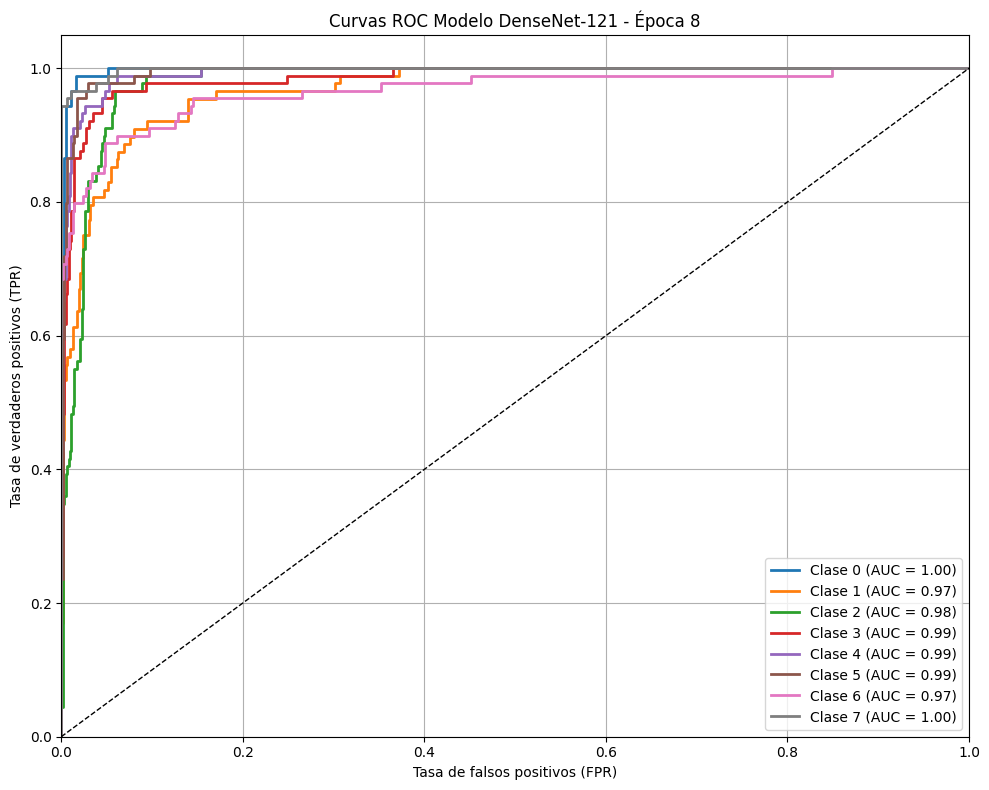

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Binariza etiquetas verdaderas (one-hot)
y_true_bin = label_binarize(true_labels_densenet_3a, classes=list(range(num_classes)))
y_score = np.array(prob_densenet_3a)

# Curva ROC por clase
plt.figure(figsize=(10, 8))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"Clase {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Tasa de falsos positivos (FPR)")
plt.ylabel("Tasa de verdaderos positivos (TPR)")
plt.title(f"Curvas ROC Modelo DenseNet-121 - Época {epoch+1}")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


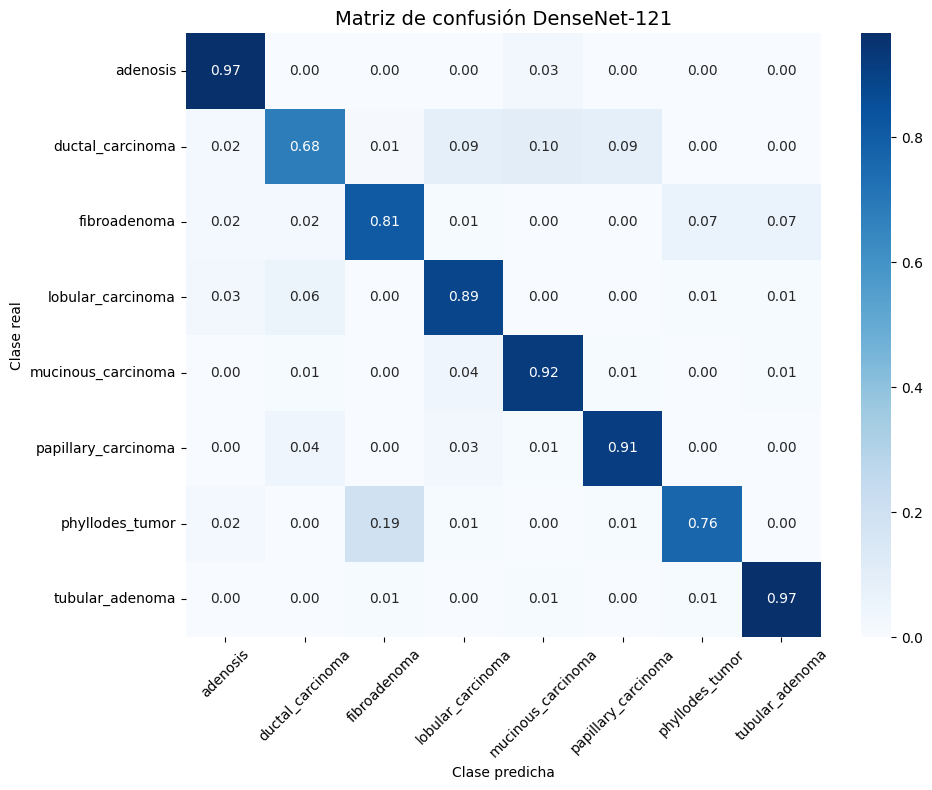

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true_labels_densenet_3a, pred_labels_densenet_3a)
cm_norm = cm.astype('float') / (cm.sum(axis=1, keepdims=True) + 1e-6)  # normalizar por fila

# Visualizar matriz normalizada
plt.figure(figsize=(10,8))
sns.heatmap(cm_norm, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=list(class_map.keys()), yticklabels=list(class_map.keys()))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Matriz de confusión DenseNet-121", fontsize=14)
plt.xlabel("Clase predicha")
plt.ylabel("Clase real")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



### PRUEBA 3b: batch-loading, SIN DATA-AUGMENTATION, SIN FINE TUNINIG, batch= 32 OK

In [ ]:
import torch
import torch.nn as nn
from torchvision.models import densenet121, DenseNet121_Weights
import os
from PIL import Image
import torchvision.transforms as transforms
from torch.utils.data import TensorDataset, DataLoader
from torchvision import models
import torch.optim as optim
from tqdm import tqdm
from random import shuffle

# =================================
# Modelo DenseNet121 preentrenado
# =================================
model = densenet121(weights=DenseNet121_Weights.DEFAULT)

# ==============================================================================
# Sin fine-tuning (congelar capas convolucionales)
# ==============================================================================
# Solo las capas convolucionales
for param in model.features.parameters():
    param.requires_grad = False

# Reemplazar la última capa del clasificador
model.classifier = nn.Linear(model.classifier.in_features, num_classes)
print(f"Modelo modificado (última capa): {model.classifier}")
model = model.to(device)

# ==============================================================================
# Función de pérdida y optimizador
# ==============================================================================
criterion = nn.CrossEntropyLoss()
# Solo se optimiza la capa final
optimizer = optim.Adam(model.classifier.parameters(), lr=1e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.5)

# ==============================================================================
# Parámetros Early Stopping
# ==============================================================================
patience = 3
min_delta = 0.001
best_val_loss = float("inf")
patience_counter = 0
best_model_wts = None

# ==============================================================================
# Entrenamiento batch-loading + Evaluación
# ==============================================================================
batch_size = 32
epochs = 50

for epoch in range(epochs):
    # ============================= Entrenamiento ==============================
    model.train()
    running_loss = 0.0
    train_indices = list(range(len(train_image_paths)))
    shuffle(train_indices)

    for start_idx in tqdm(range(0, len(train_image_paths), batch_size), desc=f"Epoch {epoch+1} [Train]", leave=False):
        batch_indices = train_indices[start_idx:start_idx+batch_size]

        images, labels_batch = [], []
        for i in batch_indices:
            img = Image.open(train_image_paths[i]).convert("RGB")
            img = transform(img)
            images.append(img)
            labels_batch.append(train_labels[i])

        images_tensor = torch.stack(images).to(device)
        labels_tensor = torch.tensor(labels_batch, dtype=torch.long).to(device)

        optimizer.zero_grad()
        outputs = model(images_tensor)
        loss = criterion(outputs, labels_tensor)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_loss = running_loss / (len(train_image_paths) / batch_size)

    # =============================== Evaluación ===============================
    model.eval()
    val_loss = 0.0
    correct, total = 0, 0
    true_labels_list, pred_labels_list, prob_list = [], [], []

    with torch.no_grad():
        for start_idx in tqdm(range(0, len(test_image_paths), batch_size), desc=f"Epoch {epoch+1} [Test]", leave=False):
            batch_indices = list(range(start_idx, min(start_idx+batch_size, len(test_image_paths))))

            images, labels_batch = [], []
            for i in batch_indices:
                img = Image.open(test_image_paths[i]).convert("RGB")
                img = transform(img)
                images.append(img)
                labels_batch.append(test_labels[i])

            images_tensor = torch.stack(images).to(device)
            labels_tensor = torch.tensor(labels_batch, dtype=torch.long).to(device)

            outputs = model(images_tensor)
            loss = criterion(outputs, labels_tensor)
            val_loss += loss.item()

            probs = torch.softmax(outputs, dim=1)
            preds = torch.argmax(probs, dim=1)

            true_labels_list.extend(labels_tensor.cpu().numpy())
            pred_labels_list.extend(preds.cpu().numpy())
            prob_list.extend(probs.cpu().numpy())

            correct += (preds == labels_tensor).sum().item()
            total += labels_tensor.size(0)

    val_loss /= (len(test_image_paths) / batch_size)
    val_acc = correct / total
    print(f"\rEpoch {epoch+1}: Train Loss={train_loss:.4f}, Test Loss={val_loss:.4f}, Test Acc={val_acc:.4f}")

    # ============================= Early Stopping =============================
    if val_loss < best_val_loss - min_delta:
        best_val_loss = val_loss
        patience_counter = 0
        best_model_wts = model.state_dict()
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print(f"🛑 Early stopping en epoch {epoch+1}")
            break

# =========================
# Restaurar mejores pesos
# =========================
model.load_state_dict(best_model_wts)


Modelo modificado (última capa): Linear(in_features=1024, out_features=8, bias=True)


Epoch 1: Train Loss=2.0792, Test Loss=2.0756, Test Acc=0.2166


Epoch 2: Train Loss=1.9470, Test Loss=1.9675, Test Acc=0.3179


Epoch 3: Train Loss=1.8366, Test Loss=1.8609, Test Acc=0.3783


Epoch 4: Train Loss=1.7473, Test Loss=1.7778, Test Acc=0.4557


Epoch 5: Train Loss=1.6779, Test Loss=1.7060, Test Acc=0.4684


Epoch 6: Train Loss=1.6149, Test Loss=1.6504, Test Acc=0.4895


Epoch 7: Train Loss=1.5504, Test Loss=1.5948, Test Acc=0.5134


Epoch 8: Train Loss=1.5056, Test Loss=1.5491, Test Acc=0.5246


Epoch 9: Train Loss=1.4692, Test Loss=1.5132, Test Acc=0.5288


Epoch 10: Train Loss=1.4292, Test Loss=1.4762, Test Acc=0.5584


Epoch 11: Train Loss=1.3946, Test Loss=1.4482, Test Acc=0.5640


Epoch 12: Train Loss=1.3566, Test Loss=1.4122, Test Acc=0.5865


Epoch 13: Train Loss=1.3342, Test Loss=1.3908, Test Acc=0.5795


Epoch 14: Train Loss=1.3084, Test Loss=1.3700, Test Acc=0.6006


Epoch 15: Train Loss=1.2827, Test Loss=1.3435, Test Acc=0.6006


Epoch 16: Train Loss=1.2637, Test Loss=1.3246, Test Acc=0.6132


Epoch 17: Train Loss=1.2420, Test Loss=1.3093, Test Acc=0.6090


Epoch 18: Train Loss=1.2301, Test Loss=1.2813, Test Acc=0.6217


Epoch 19: Train Loss=1.1968, Test Loss=1.2775, Test Acc=0.6217


Epoch 20: Train Loss=1.1887, Test Loss=1.2564, Test Acc=0.6399


Epoch 21: Train Loss=1.1692, Test Loss=1.2424, Test Acc=0.6343


Epoch 22: Train Loss=1.1459, Test Loss=1.2353, Test Acc=0.6287


Epoch 23: Train Loss=1.1388, Test Loss=1.2111, Test Acc=0.6442


Epoch 24: Train Loss=1.1267, Test Loss=1.2025, Test Acc=0.6301


Epoch 25: Train Loss=1.1105, Test Loss=1.1879, Test Acc=0.6442


Epoch 26: Train Loss=1.0957, Test Loss=1.1809, Test Acc=0.6540


Epoch 27: Train Loss=1.0858, Test Loss=1.1721, Test Acc=0.6414


Epoch 28: Train Loss=1.0651, Test Loss=1.1567, Test Acc=0.6540


Epoch 29: Train Loss=1.0640, Test Loss=1.1517, Test Acc=0.6639


Epoch 30: Train Loss=1.0566, Test Loss=1.1439, Test Acc=0.6709


Epoch 31: Train Loss=1.0467, Test Loss=1.1311, Test Acc=0.6639


Epoch 32: Train Loss=1.0373, Test Loss=1.1232, Test Acc=0.6639


Epoch 33: Train Loss=1.0249, Test Loss=1.1233, Test Acc=0.6540


Epoch 34: Train Loss=1.0205, Test Loss=1.1062, Test Acc=0.6624


Epoch 35: Train Loss=1.0083, Test Loss=1.1003, Test Acc=0.6850


Epoch 36: Train Loss=0.9962, Test Loss=1.1023, Test Acc=0.6667


Epoch 37: Train Loss=0.9864, Test Loss=1.0867, Test Acc=0.6835


Epoch 38: Train Loss=0.9880, Test Loss=1.0892, Test Acc=0.6793


Epoch 39: Train Loss=0.9732, Test Loss=1.0735, Test Acc=0.6624


Epoch 40: Train Loss=0.9773, Test Loss=1.0607, Test Acc=0.6821


Epoch 41: Train Loss=0.9588, Test Loss=1.0655, Test Acc=0.6793


Epoch 42: Train Loss=0.9631, Test Loss=1.0618, Test Acc=0.6835


Epoch 43: Train Loss=0.9462, Test Loss=1.0542, Test Acc=0.6821


Epoch 44: Train Loss=0.9403, Test Loss=1.0528, Test Acc=0.6878


Epoch 45: Train Loss=0.9365, Test Loss=1.0450, Test Acc=0.6850


Epoch 46: Train Loss=0.9220, Test Loss=1.0526, Test Acc=0.6878


Epoch 47: Train Loss=0.9241, Test Loss=1.0412, Test Acc=0.6878


Epoch 48: Train Loss=0.9077, Test Loss=1.0367, Test Acc=0.6850


Epoch 49: Train Loss=0.9186, Test Loss=1.0331, Test Acc=0.6892


Epoch 50: Train Loss=0.9063, Test Loss=1.0246, Test Acc=0.6835


<All keys matched successfully>

In [ ]:
# Prueba 3
true_labels_densenet_3b = true_labels_list
pred_labels_densenet_3b = pred_labels_list
prob_densenet_3b = prob_list

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

acc_densenet_3b = accuracy_score(true_labels_densenet_3b, pred_labels_densenet_3b)
error_rate_densenet_3b = 1 - acc_densenet_3b
print(f"Accuracy total: {acc_densenet_3b:.4f}, Error rate: {error_rate_densenet_3b:.4f}\n")

print(classification_report(
    true_labels_densenet_3b,
    pred_labels_densenet_3b,
    labels=list(range(len(class_map))),
    target_names=class_map.keys(),
    zero_division=0
))

Accuracy total: 0.6835, Error rate: 0.3165

                     precision    recall  f1-score   support

           adenosis       0.75      0.88      0.81        89
   ductal_carcinoma       0.62      0.62      0.62        88
       fibroadenoma       0.64      0.55      0.59        89
  lobular_carcinoma       0.76      0.67      0.71        89
 mucinous_carcinoma       0.64      0.65      0.64        89
papillary_carcinoma       0.62      0.67      0.65        89
    phyllodes_tumor       0.69      0.64      0.66        89
    tubular_adenoma       0.74      0.78      0.76        89

           accuracy                           0.68       711
          macro avg       0.68      0.68      0.68       711
       weighted avg       0.68      0.68      0.68       711



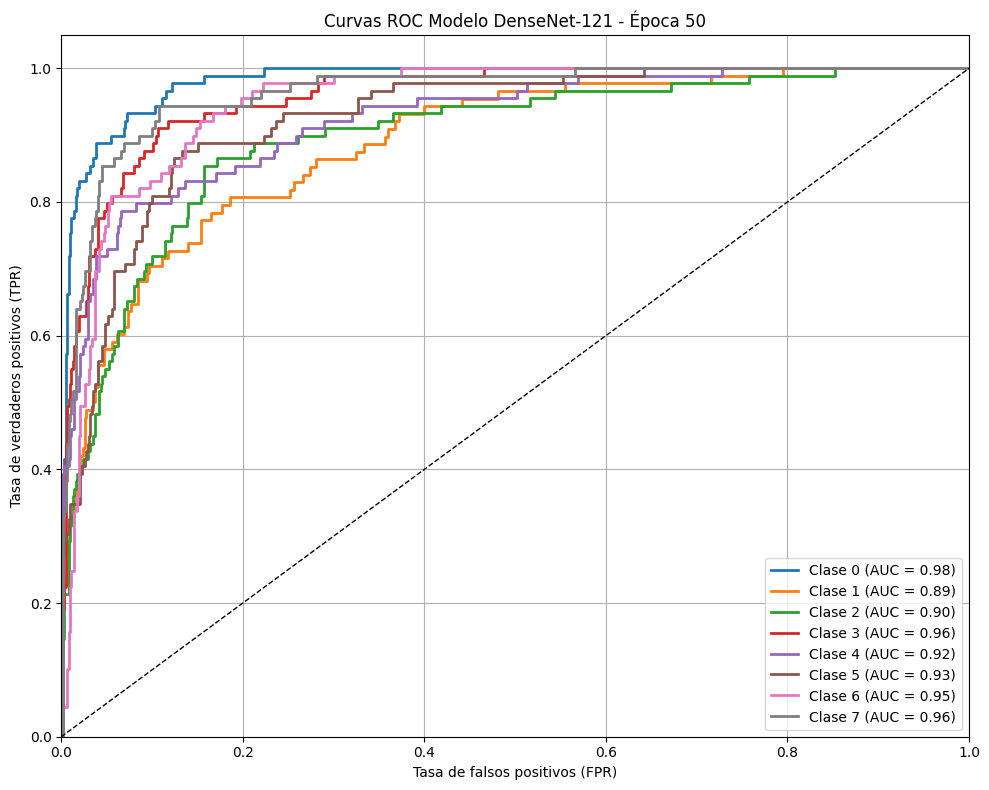

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Binariza etiquetas verdaderas (one-hot)
y_true_bin = label_binarize(true_labels_densenet_3b, classes=list(range(num_classes)))
y_score = np.array(prob_densenet_3b)

# Curva ROC por clase
plt.figure(figsize=(10, 8))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"Clase {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Tasa de falsos positivos (FPR)")
plt.ylabel("Tasa de verdaderos positivos (TPR)")
plt.title(f"Curvas ROC Modelo DenseNet-121 - Época {epoch+1}")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


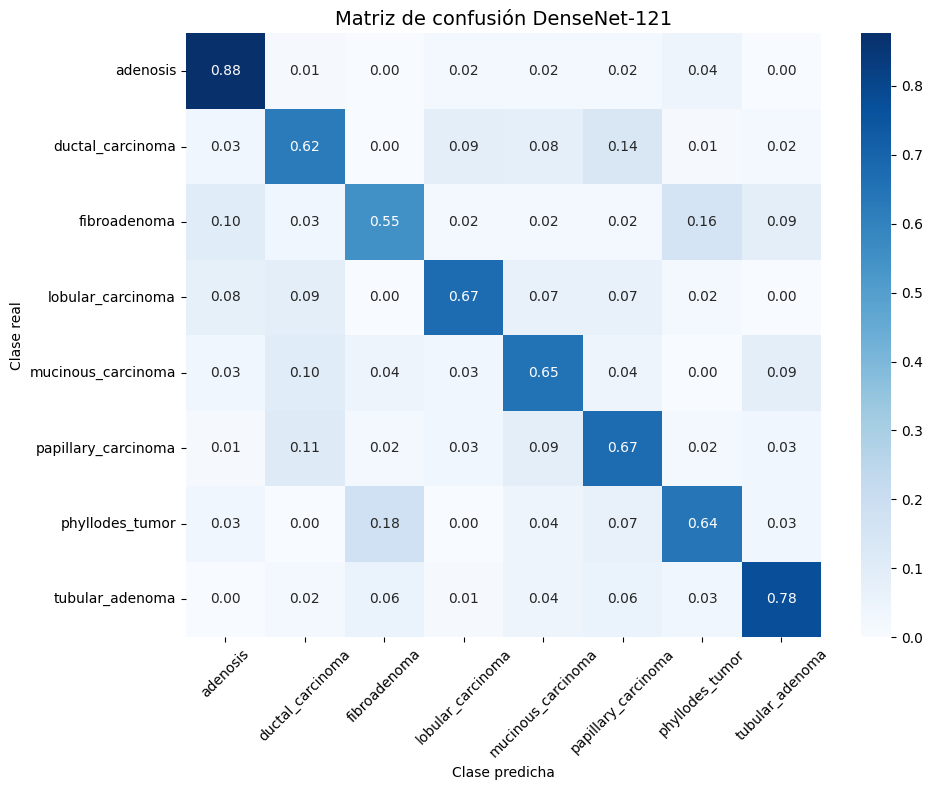

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true_labels_densenet_3b, pred_labels_densenet_3b)
cm_norm = cm.astype('float') / (cm.sum(axis=1, keepdims=True) + 1e-6)  # normalizar por fila

# Visualizar matriz normalizada
plt.figure(figsize=(10,8))
sns.heatmap(cm_norm, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=list(class_map.keys()), yticklabels=list(class_map.keys()))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Matriz de confusión DenseNet-121", fontsize=14)
plt.xlabel("Clase predicha")
plt.ylabel("Clase real")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



### PRUEBA 4a: batch-loading, SIN DATA-AUGMENTATION, CON FINE TUNINIG, batch= 16 OK

In [ ]:
import torch
import torch.nn as nn
from torchvision.models import densenet121, DenseNet121_Weights
import os
from PIL import Image
import torchvision.transforms as transforms
from torch.utils.data import TensorDataset, DataLoader
from torchvision import models
import torch.optim as optim
from tqdm import tqdm
from random import shuffle


# =================================
# Modelo DenseNet121 preentrenado
# =================================
model = densenet121(weights=DenseNet121_Weights.DEFAULT)

# ==============================================================================
# Fine-tuning completo (descongelar capas convolucionales)
# ==============================================================================
# Las capas están descongeladas y se entrenarán.
for param in model.parameters():
    param.requires_grad = True

# Reemplazar la última capa del clasificador
model.classifier = nn.Linear(model.classifier.in_features, num_classes)
print(f"Modelo modificado (última capa): {model.classifier}")
model = model.to(device)

# ==============================================================================
# Función de pérdida y optimizador
# ==============================================================================
criterion = nn.CrossEntropyLoss()
# Se optimizan todas las capas
optimizer = optim.Adam(model.parameters(), lr=1e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.5)

# ==============================================================================
# Parámetros Early Stopping
# ==============================================================================
patience = 3
min_delta = 0.001
best_val_loss = float("inf")
patience_counter = 0
best_model_wts = None

# ==============================================================================
# Entrenamiento batch-loading + Evaluación
# ==============================================================================
batch_size = 16
epochs = 50

for epoch in range(epochs):
    # ============================= Entrenamiento ==============================
    model.train()
    running_loss = 0.0
    train_indices = list(range(len(train_image_paths)))
    shuffle(train_indices)

    for start_idx in tqdm(range(0, len(train_image_paths), batch_size), desc=f"Epoch {epoch+1} [Train]", leave=False):
        batch_indices = train_indices[start_idx:start_idx+batch_size]

        images, labels_batch = [], []
        for i in batch_indices:
            img = Image.open(train_image_paths[i]).convert("RGB")
            img = transform(img)
            images.append(img)
            labels_batch.append(train_labels[i])

        images_tensor = torch.stack(images).to(device)
        labels_tensor = torch.tensor(labels_batch, dtype=torch.long).to(device)

        optimizer.zero_grad()
        outputs = model(images_tensor)
        loss = criterion(outputs, labels_tensor)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_loss = running_loss / (len(train_image_paths) / batch_size)

    # =============================== Evaluación ===============================
    model.eval()
    val_loss = 0.0
    correct, total = 0, 0
    true_labels_list, pred_labels_list, prob_list = [], [], []

    with torch.no_grad():
        for start_idx in tqdm(range(0, len(test_image_paths), batch_size), desc=f"Epoch {epoch+1} [Test]", leave=False):
            batch_indices = list(range(start_idx, min(start_idx+batch_size, len(test_image_paths))))

            images, labels_batch = [], []
            for i in batch_indices:
                img = Image.open(test_image_paths[i]).convert("RGB")
                img = transform(img)
                images.append(img)
                labels_batch.append(test_labels[i])

            images_tensor = torch.stack(images).to(device)
            labels_tensor = torch.tensor(labels_batch, dtype=torch.long).to(device)

            outputs = model(images_tensor)
            loss = criterion(outputs, labels_tensor)
            val_loss += loss.item()

            probs = torch.softmax(outputs, dim=1)
            preds = torch.argmax(probs, dim=1)

            true_labels_list.extend(labels_tensor.cpu().numpy())
            pred_labels_list.extend(preds.cpu().numpy())
            prob_list.extend(probs.cpu().numpy())

            correct += (preds == labels_tensor).sum().item()
            total += labels_tensor.size(0)

    val_loss /= (len(test_image_paths) / batch_size)
    val_acc = correct / total
    print(f"\rEpoch {epoch+1}: Train Loss={train_loss:.4f}, Test Loss={val_loss:.4f}, Test Acc={val_acc:.4f}")

    # ============================= Early Stopping =============================
    if val_loss < best_val_loss - min_delta:
        best_val_loss = val_loss
        patience_counter = 0
        best_model_wts = model.state_dict()
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print(f"🛑 Early stopping en epoch {epoch+1}")
            break

# =========================
# Restaurar mejores pesos
# =========================
model.load_state_dict(best_model_wts)


Modelo modificado (última capa): Linear(in_features=1024, out_features=8, bias=True)


Epoch 1: Train Loss=1.2411, Test Loss=0.6663, Test Acc=0.7890


Epoch 2: Train Loss=0.5495, Test Loss=0.4557, Test Acc=0.8453


Epoch 3: Train Loss=0.3350, Test Loss=0.4676, Test Acc=0.8354


Epoch 4: Train Loss=0.2089, Test Loss=0.4208, Test Acc=0.8467


Epoch 5: Train Loss=0.1606, Test Loss=0.3643, Test Acc=0.8734


Epoch 6: Train Loss=0.0953, Test Loss=0.3645, Test Acc=0.8762


Epoch 7: Train Loss=0.0832, Test Loss=0.3957, Test Acc=0.8664


Epoch 8: Train Loss=0.0678, Test Loss=0.4630, Test Acc=0.8551
🛑 Early stopping en epoch 8


<All keys matched successfully>

In [ ]:
# Prueba 4
true_labels_densenet_4a = true_labels_list
pred_labels_densenet_4a = pred_labels_list
prob_densenet_4a = prob_list

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

acc_densenet_4a = accuracy_score(true_labels_densenet_4a, pred_labels_densenet_4a)
error_rate_densenet_4a = 1 - acc_densenet_4a
print(f"Accuracy total: {acc_densenet_4a:.4f}, Error rate: {error_rate_densenet_4a:.4f}\n")

print(classification_report(
    true_labels_densenet_4a,
    pred_labels_densenet_4a,
    labels=list(range(len(class_map))),
    target_names=class_map.keys(),
    zero_division=0
))

Accuracy total: 0.8551, Error rate: 0.1449

                     precision    recall  f1-score   support

           adenosis       0.93      0.93      0.93        89
   ductal_carcinoma       0.89      0.66      0.76        88
       fibroadenoma       0.72      0.88      0.79        89
  lobular_carcinoma       0.89      0.87      0.88        89
 mucinous_carcinoma       0.74      0.92      0.82        89
papillary_carcinoma       0.96      0.88      0.92        89
    phyllodes_tumor       0.92      0.78      0.84        89
    tubular_adenoma       0.88      0.93      0.91        89

           accuracy                           0.86       711
          macro avg       0.87      0.85      0.85       711
       weighted avg       0.87      0.86      0.86       711



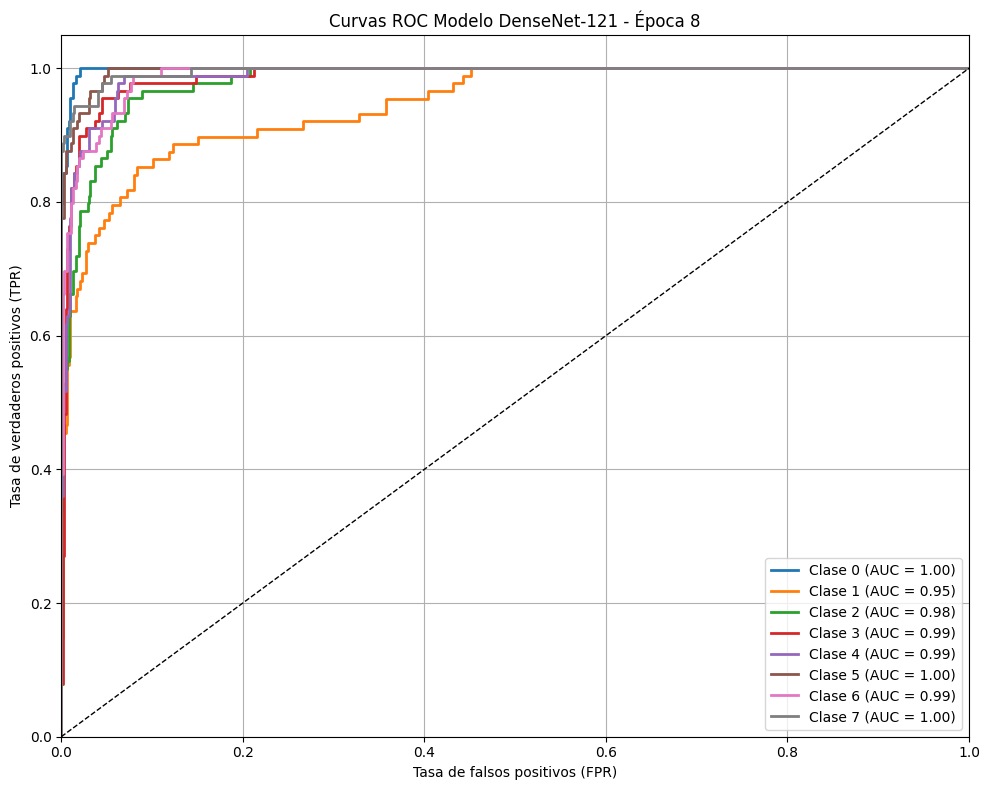

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Binariza etiquetas verdaderas (one-hot)
y_true_bin = label_binarize(true_labels_densenet_4a, classes=list(range(num_classes)))
y_score = np.array(prob_densenet_4a)

# Curva ROC por clase
plt.figure(figsize=(10, 8))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"Clase {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Tasa de falsos positivos (FPR)")
plt.ylabel("Tasa de verdaderos positivos (TPR)")
plt.title(f"Curvas ROC Modelo DenseNet-121 - Época {epoch+1}")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


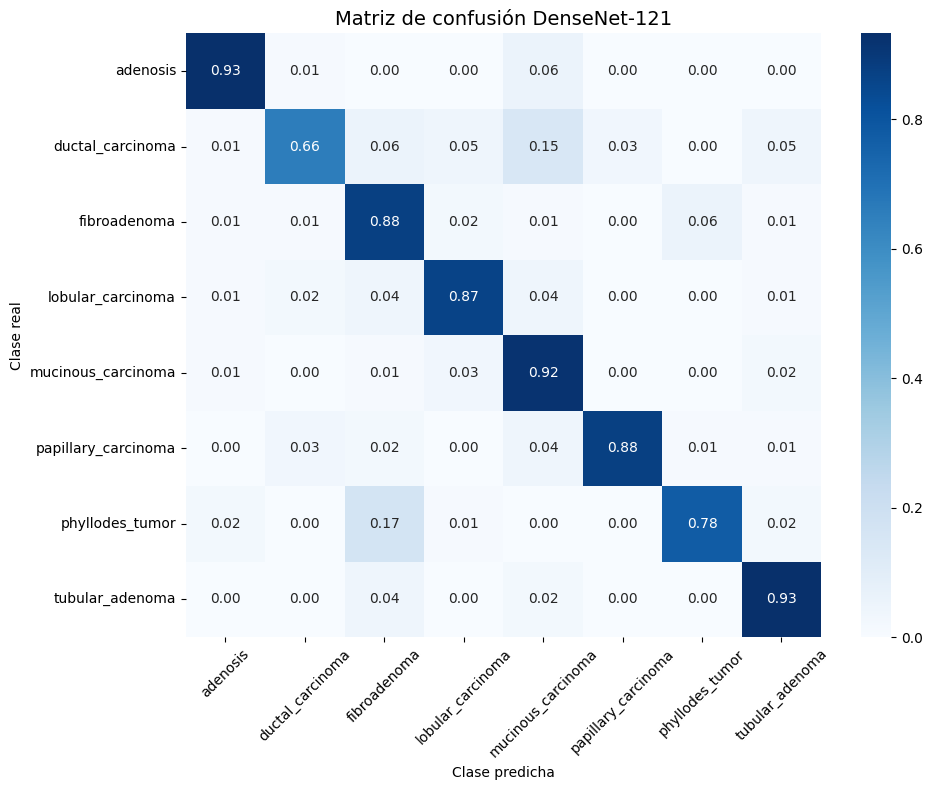

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true_labels_densenet_4a, pred_labels_densenet_4a)
cm_norm = cm.astype('float') / (cm.sum(axis=1, keepdims=True) + 1e-6)  # normalizar por fila

# Visualizar matriz normalizada
plt.figure(figsize=(10,8))
sns.heatmap(cm_norm, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=list(class_map.keys()), yticklabels=list(class_map.keys()))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Matriz de confusión DenseNet-121", fontsize=14)
plt.xlabel("Clase predicha")
plt.ylabel("Clase real")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



### PRUEBA 4b: batch-loading, SIN DATA-AUGMENTATION, SIN FINE TUNINIG, batch= 16 OK

In [5]:
import torch
import torch.nn as nn
from torchvision.models import densenet121, DenseNet121_Weights
import os
from PIL import Image
import torchvision.transforms as transforms
from torch.utils.data import TensorDataset, DataLoader
from torchvision import models
import torch.optim as optim
from tqdm import tqdm
from random import shuffle


# =================================
# Modelo DenseNet121 preentrenado
# =================================
model = densenet121(weights=DenseNet121_Weights.DEFAULT)

# ==============================================================================
# Sin fine-tuning (congelar capas convolucionales)
# ==============================================================================
# Solo las capas convolucionales
for param in model.features.parameters():
    param.requires_grad = False

# Reemplazar la última capa del clasificador
model.classifier = nn.Linear(model.classifier.in_features, num_classes)
print(f"Modelo modificado (última capa): {model.classifier}")
model = model.to(device)

# ==============================================================================
# Función de pérdida y optimizador
# ==============================================================================
criterion = nn.CrossEntropyLoss()
# Solo se optimiza la capa final
optimizer = optim.Adam(model.classifier.parameters(), lr=1e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.5)

# ==============================================================================
# Parámetros Early Stopping
# ==============================================================================
patience = 3
min_delta = 0.001
best_val_loss = float("inf")
patience_counter = 0
best_model_wts = None

# ==============================================================================
# Entrenamiento batch-loading + Evaluación
# ==============================================================================
batch_size = 16
epochs = 50

for epoch in range(epochs):
    # ============================= Entrenamiento ==============================
    model.train()
    running_loss = 0.0
    train_indices = list(range(len(train_image_paths)))
    shuffle(train_indices)

    for start_idx in tqdm(range(0, len(train_image_paths), batch_size), desc=f"Epoch {epoch+1} [Train]", leave=False):
        batch_indices = train_indices[start_idx:start_idx+batch_size]

        images, labels_batch = [], []
        for i in batch_indices:
            img = Image.open(train_image_paths[i]).convert("RGB")
            img = transform(img)
            images.append(img)
            labels_batch.append(train_labels[i])

        images_tensor = torch.stack(images).to(device)
        labels_tensor = torch.tensor(labels_batch, dtype=torch.long).to(device)

        optimizer.zero_grad()
        outputs = model(images_tensor)
        loss = criterion(outputs, labels_tensor)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_loss = running_loss / (len(train_image_paths) / batch_size)

    # =============================== Evaluación ===============================
    model.eval()
    val_loss = 0.0
    correct, total = 0, 0
    true_labels_list, pred_labels_list, prob_list = [], [], []

    with torch.no_grad():
        for start_idx in tqdm(range(0, len(test_image_paths), batch_size), desc=f"Epoch {epoch+1} [Test]", leave=False):
            batch_indices = list(range(start_idx, min(start_idx+batch_size, len(test_image_paths))))

            images, labels_batch = [], []
            for i in batch_indices:
                img = Image.open(test_image_paths[i]).convert("RGB")
                img = transform(img)
                images.append(img)
                labels_batch.append(test_labels[i])

            images_tensor = torch.stack(images).to(device)
            labels_tensor = torch.tensor(labels_batch, dtype=torch.long).to(device)

            outputs = model(images_tensor)
            loss = criterion(outputs, labels_tensor)
            val_loss += loss.item()

            probs = torch.softmax(outputs, dim=1)
            preds = torch.argmax(probs, dim=1)

            true_labels_list.extend(labels_tensor.cpu().numpy())
            pred_labels_list.extend(preds.cpu().numpy())
            prob_list.extend(probs.cpu().numpy())

            correct += (preds == labels_tensor).sum().item()
            total += labels_tensor.size(0)

    val_loss /= (len(test_image_paths) / batch_size)
    val_acc = correct / total
    print(f"\rEpoch {epoch+1}: Train Loss={train_loss:.4f}, Test Loss={val_loss:.4f}, Test Acc={val_acc:.4f}")

    # ============================= Early Stopping =============================
    if val_loss < best_val_loss - min_delta:
        best_val_loss = val_loss
        patience_counter = 0
        best_model_wts = model.state_dict()
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print(f"🛑 Early stopping en epoch {epoch+1}")
            break

# =========================
# Restaurar mejores pesos
# =========================
model.load_state_dict(best_model_wts)


Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth


100%|██████████| 30.8M/30.8M [00:00<00:00, 110MB/s] 


Modelo modificado (última capa): Linear(in_features=1024, out_features=8, bias=True)


Epoch 1: Train Loss=2.0538, Test Loss=1.9920, Test Acc=0.2574


Epoch 2: Train Loss=1.9000, Test Loss=1.8531, Test Acc=0.3502


Epoch 3: Train Loss=1.7790, Test Loss=1.7396, Test Acc=0.4388


Epoch 4: Train Loss=1.6902, Test Loss=1.6527, Test Acc=0.4346


Epoch 5: Train Loss=1.6076, Test Loss=1.5930, Test Acc=0.4754


Epoch 6: Train Loss=1.5464, Test Loss=1.5180, Test Acc=0.4937


Epoch 7: Train Loss=1.4968, Test Loss=1.4696, Test Acc=0.5176


Epoch 8: Train Loss=1.4399, Test Loss=1.4204, Test Acc=0.5359


Epoch 9: Train Loss=1.4001, Test Loss=1.3827, Test Acc=0.5570


Epoch 10: Train Loss=1.3638, Test Loss=1.3492, Test Acc=0.5612


Epoch 11: Train Loss=1.3332, Test Loss=1.3138, Test Acc=0.5654


Epoch 12: Train Loss=1.2933, Test Loss=1.2910, Test Acc=0.5781


Epoch 13: Train Loss=1.2774, Test Loss=1.2643, Test Acc=0.5949


Epoch 14: Train Loss=1.2578, Test Loss=1.2379, Test Acc=0.6020


Epoch 15: Train Loss=1.2188, Test Loss=1.2296, Test Acc=0.6006


Epoch 16: Train Loss=1.2013, Test Loss=1.1958, Test Acc=0.5963


Epoch 17: Train Loss=1.1863, Test Loss=1.1859, Test Acc=0.6273


Epoch 18: Train Loss=1.1692, Test Loss=1.1724, Test Acc=0.6273


Epoch 19: Train Loss=1.1497, Test Loss=1.1494, Test Acc=0.6273


Epoch 20: Train Loss=1.1380, Test Loss=1.1311, Test Acc=0.6203


Epoch 21: Train Loss=1.1249, Test Loss=1.1134, Test Acc=0.6357


Epoch 22: Train Loss=1.1119, Test Loss=1.1039, Test Acc=0.6414


Epoch 23: Train Loss=1.1000, Test Loss=1.0974, Test Acc=0.6273


Epoch 24: Train Loss=1.0775, Test Loss=1.0823, Test Acc=0.6399


Epoch 25: Train Loss=1.0766, Test Loss=1.0769, Test Acc=0.6442


Epoch 26: Train Loss=1.0538, Test Loss=1.0593, Test Acc=0.6428


Epoch 27: Train Loss=1.0482, Test Loss=1.0497, Test Acc=0.6470


Epoch 28: Train Loss=1.0384, Test Loss=1.0404, Test Acc=0.6428


Epoch 29: Train Loss=1.0280, Test Loss=1.0267, Test Acc=0.6639


Epoch 30: Train Loss=1.0131, Test Loss=1.0295, Test Acc=0.6582


Epoch 31: Train Loss=1.0135, Test Loss=1.0110, Test Acc=0.6667


Epoch 32: Train Loss=0.9969, Test Loss=1.0239, Test Acc=0.6624


Epoch 33: Train Loss=0.9902, Test Loss=1.0002, Test Acc=0.6681


Epoch 34: Train Loss=0.9903, Test Loss=1.0089, Test Acc=0.6624


Epoch 35: Train Loss=0.9734, Test Loss=0.9933, Test Acc=0.6568


Epoch 36: Train Loss=0.9704, Test Loss=0.9787, Test Acc=0.6793


Epoch 37: Train Loss=0.9678, Test Loss=0.9753, Test Acc=0.6793


Epoch 38: Train Loss=0.9487, Test Loss=0.9725, Test Acc=0.6779


Epoch 39: Train Loss=0.9435, Test Loss=0.9636, Test Acc=0.6624


Epoch 40: Train Loss=0.9428, Test Loss=0.9565, Test Acc=0.6751


Epoch 41: Train Loss=0.9324, Test Loss=0.9564, Test Acc=0.6878


Epoch 42: Train Loss=0.9350, Test Loss=0.9531, Test Acc=0.6751


Epoch 43: Train Loss=0.9266, Test Loss=0.9398, Test Acc=0.6737


Epoch 44: Train Loss=0.9220, Test Loss=0.9425, Test Acc=0.6751


Epoch 45: Train Loss=0.9139, Test Loss=0.9481, Test Acc=0.6624


Epoch 46: Train Loss=0.9212, Test Loss=0.9336, Test Acc=0.6920


Epoch 47: Train Loss=0.8969, Test Loss=0.9336, Test Acc=0.6751


Epoch 48: Train Loss=0.8990, Test Loss=0.9255, Test Acc=0.6793


Epoch 49: Train Loss=0.8918, Test Loss=0.9265, Test Acc=0.6821


Epoch 50: Train Loss=0.8858, Test Loss=0.9134, Test Acc=0.6948


<All keys matched successfully>

In [ ]:
# Prueba 4
true_labels_densenet_4b = true_labels_list
pred_labels_densenet_4b = pred_labels_list
prob_densenet_4b = prob_list

In [28]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

acc_densenet_4b = accuracy_score(true_labels_densenet_4b, pred_labels_densenet_4b)
error_rate_densenet_4b = 1 - acc_densenet_4b
print(f"Accuracy total: {acc_densenet_4b:.4f}, Error rate: {error_rate_densenet_4b:.4f}\n")

print(classification_report(
    true_labels_densenet_4b,
    pred_labels_densenet_4b,
    labels=list(range(len(class_map))),
    target_names=class_map.keys(),
    zero_division=0
))

Accuracy total: 0.6948, Error rate: 0.3052

                     precision    recall  f1-score   support

           adenosis       0.82      0.73      0.77        89
   ductal_carcinoma       0.66      0.59      0.62        88
       fibroadenoma       0.65      0.57      0.61        89
  lobular_carcinoma       0.64      0.76      0.70        89
 mucinous_carcinoma       0.62      0.69      0.65        89
papillary_carcinoma       0.70      0.70      0.70        89
    phyllodes_tumor       0.67      0.72      0.70        89
    tubular_adenoma       0.82      0.80      0.81        89

           accuracy                           0.69       711
          macro avg       0.70      0.69      0.69       711
       weighted avg       0.70      0.69      0.69       711



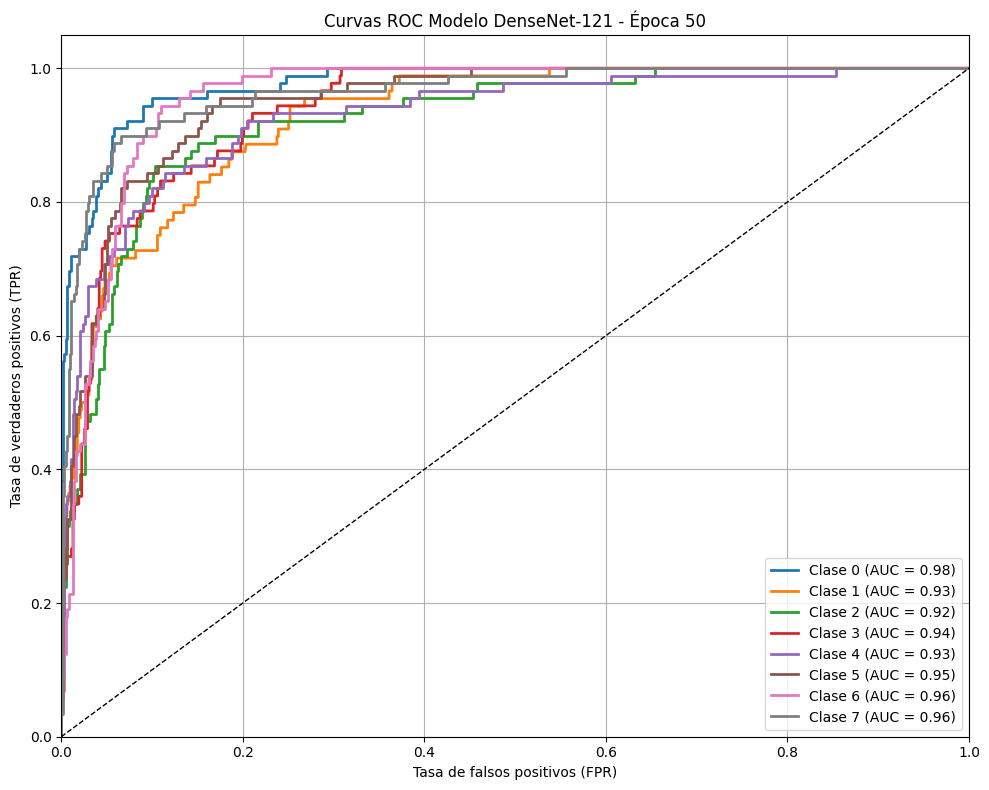

In [8]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Binariza etiquetas verdaderas (one-hot)
y_true_bin = label_binarize(true_labels_densenet_4b, classes=list(range(num_classes)))
y_score = np.array(prob_densenet_4b)

# Curva ROC por clase
plt.figure(figsize=(10, 8))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"Clase {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Tasa de falsos positivos (FPR)")
plt.ylabel("Tasa de verdaderos positivos (TPR)")
plt.title(f"Curvas ROC Modelo DenseNet-121 - Época {epoch+1}")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


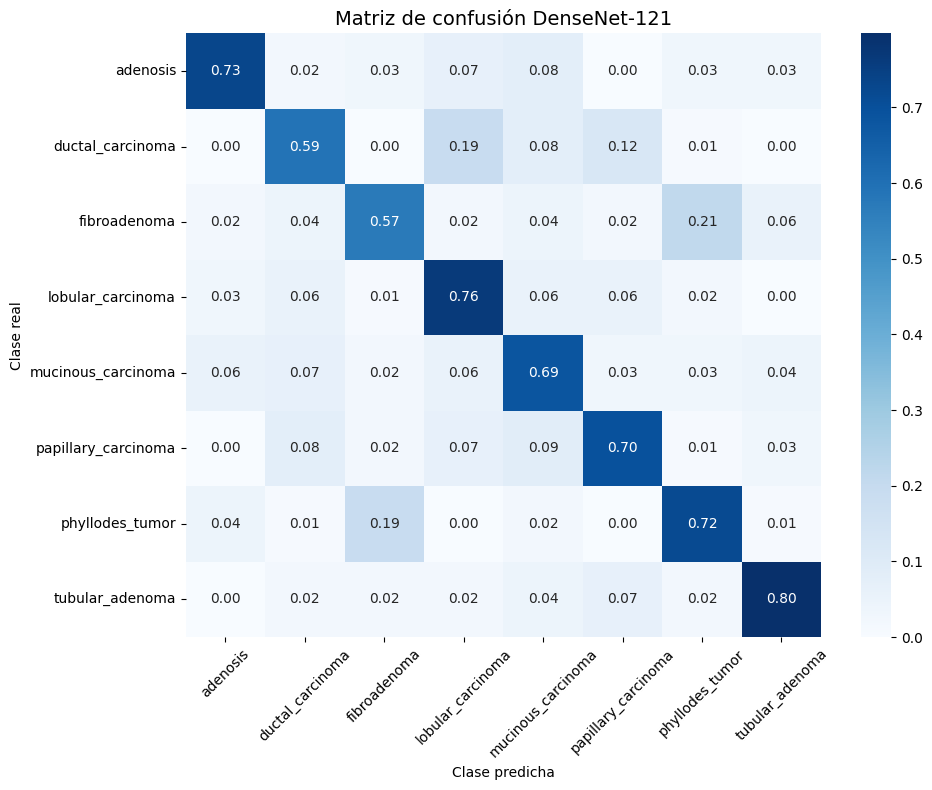

In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true_labels_densenet_4b, pred_labels_densenet_4b)
cm_norm = cm.astype('float') / (cm.sum(axis=1, keepdims=True) + 1e-6)  # normalizar por fila

# Visualizar matriz normalizada
plt.figure(figsize=(10,8))
sns.heatmap(cm_norm, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=list(class_map.keys()), yticklabels=list(class_map.keys()))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Matriz de confusión DenseNet-121", fontsize=14)
plt.xlabel("Clase predicha")
plt.ylabel("Clase real")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

